# Results from DFT Calculations
This jupyter notebook extracts the results from the DFT calculations given from VASP.

## Bulk Structure
The figure below illustrates a unit cell of a structure on the form AB$_2$ with a space group: Pnma 62, which illustrates an orthorombic structure containing 8 A(Ba $\&$ Sr)-atoms  (large green spheres) and 16 B (Si, Ge, C)-atoms (small blue spheres) that are contained in the unit cell.

<img src="../Figures/cell.png">

## Convergence
In this section we are going to check convergence of various calculated properties and we will focus on the material BaSi$_2$ for the convergence tests, and base our calculation on these values throughout this project. 


### Convergence test of the total energy per unit cell with respect to energy cutoff.
We start by looking at the convergence of the total energy as a function of the energy cutoff.This can be visualized by plotting the total energy as a function of the cutoff energy and this isillustrated in Figure 1 below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
import tqdm as tqdm
from matplotlib import rc
import seaborn as sns
import pandas as pd
import sys
import re
sns.set()
sys.path.append('../../')
from Code.python_scripts.functions.data import readFilesFromDirectory, readEnergyFromFile, read_table, read_atoms, read_bond_lengths




In [2]:
w = 5.78851          # Latex document text width
h = 4.5

#Latex font for plots
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=False)
rc('font', family='serif')
rc('figure', figsize=(w, h))
plt.rcParams.update({'font.size': 10}) # Setting all font sizes
plt.rcParams.update({'figure.autolayout': True})

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


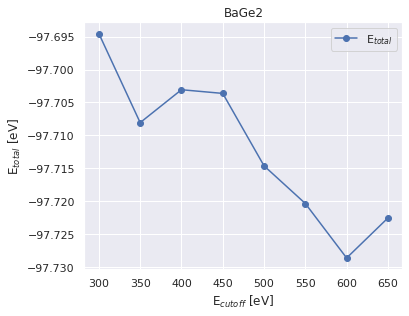

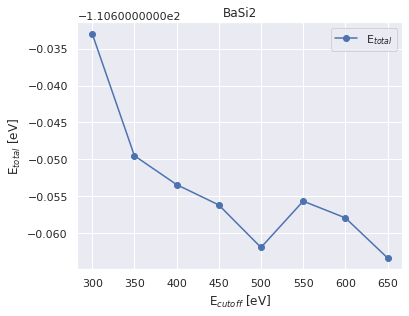

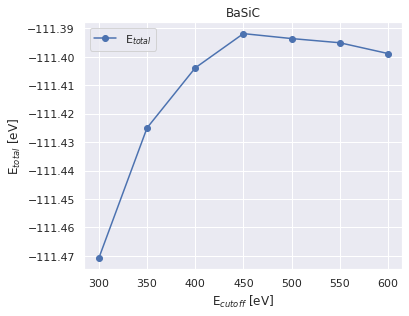

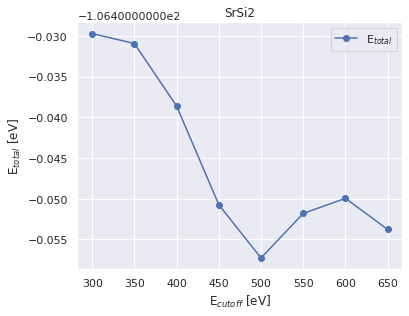

In [3]:
folders = ['BaGe2', 'BaSi2', 'BaSiC', 'SrSi2']
cutoff = np.arange(300, 700, 50)
roundoff = 3
for folder in folders:
    thisdir = '../Bulk/' + folder + '/convergence_Results'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    data = readEnergyFromFile(filepaths, filenames)

    total_energy = data['ecut1.txt']

    plt.plot(cutoff, total_energy, '-o')
    plt.legend(["E$_{total}$"])
    plt.title(folder)
    plt.xlabel("E$_{cutoff}$ [eV]")
    plt.ylabel("E$_{total}$ [eV]")
    plt.show()

### Energy Difference


,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-97.695,NaN
350,-97.708,13.51012
400,-97.703,4.99546
450,-97.704,0.56032
500,-97.715,10.99305
550,-97.720,5.71906
600,-97.729,8.2657
650,-97.723,6.07102


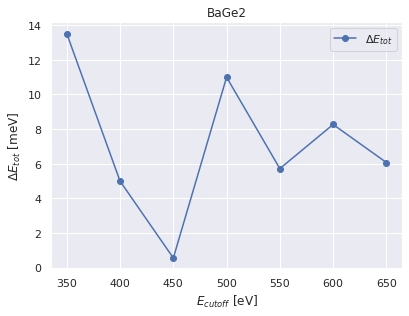

\begin{longtable}{lrr}
\toprule
{} &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                         \\
\midrule
\endfirsthead

\toprule
{} &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                         \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
300       &         -97.695 &                     NaN \\
350       &         -97.708 &                  13.510 \\
400       &         -97.703 &                   4.995 \\
450       &         -97.704 &                   0.560 \\
500       &         -97.715 &                  10.993 \\
550       &         -97.720 &                   5.719 \\
600       &         -97.729 &                   8.266 \\
650       &         -97.723 &                   6.071 \\
\end{longtable}



,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-110.633,NaN
350,-110.650,16.53597
400,-110.653,3.90985
450,-110.656,2.7604
500,-110.662,5.75466
550,-110.656,6.27426
600,-110.658,2.26977
650,-110.663,5.42838


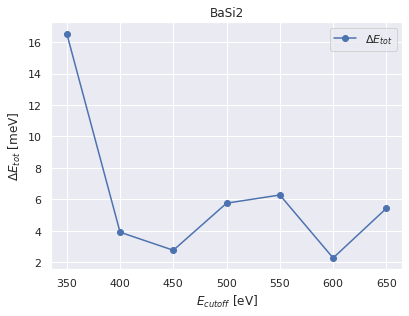

\begin{longtable}{lrr}
\toprule
{} &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                         \\
\midrule
\endfirsthead

\toprule
{} &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                         \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
300       &        -110.633 &                     NaN \\
350       &        -110.650 &                  16.536 \\
400       &        -110.653 &                   3.910 \\
450       &        -110.656 &                   2.760 \\
500       &        -110.662 &                   5.755 \\
550       &        -110.656 &                   6.274 \\
600       &        -110.658 &                   2.270 \\
650       &        -110.663 &                   5.428 \\
\end{longtable}



,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-111.471,NaN
350,-111.425,45.73781
400,-111.404,21.08543
450,-111.392,12.04798
500,-111.394,1.73754
550,-111.395,1.47224
600,-111.399,3.78534
650,NaN,NaN


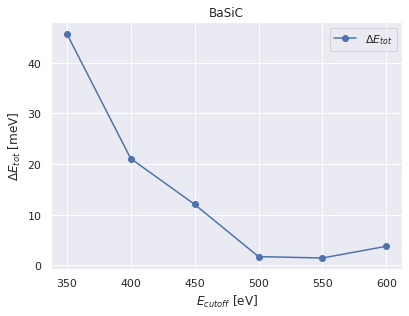

\begin{longtable}{lrr}
\toprule
{} &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                         \\
\midrule
\endfirsthead

\toprule
{} &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                         \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
300       &        -111.471 &                     NaN \\
350       &        -111.425 &                  45.738 \\
400       &        -111.404 &                  21.085 \\
450       &        -111.392 &                  12.048 \\
500       &        -111.394 &                   1.738 \\
550       &        -111.395 &                   1.472 \\
600       &        -111.399 &                   3.785 \\
650       &             NaN &                     NaN \\
\end{longtable}



,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-106.430,NaN
350,-106.431,1.21441
400,-106.439,7.67401
450,-106.451,12.11459
500,-106.457,6.53672
550,-106.452,5.46818
600,-106.450,1.85189
650,-106.454,3.8137


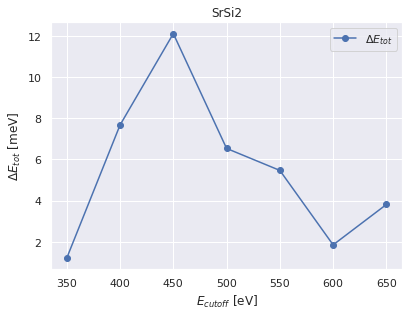

\begin{longtable}{lrr}
\toprule
{} &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                         \\
\midrule
\endfirsthead

\toprule
{} &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                         \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
300       &        -106.430 &                     NaN \\
350       &        -106.431 &                   1.214 \\
400       &        -106.439 &                   7.674 \\
450       &        -106.451 &                  12.115 \\
500       &        -106.457 &                   6.537 \\
550       &        -106.452 &                   5.468 \\
600       &        -106.450 &                   1.852 \\
650       &        -106.454 &                   3.814 \\
\end{longtable}



In [4]:
for folder in folders:
    
    thisdir = '../Bulk/' + folder + '/convergence_Results'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    data = readEnergyFromFile(filepaths, filenames)
    
    
    energy = pd.DataFrame({"E$_{cut}$": cutoff, "$E_{tot}$ [eV]": data['ecut1.txt']})
    diff = []
    diff.append('NaN')
    for i in range(1, len(data['ecut1.txt'])):
        temp_value = abs(data['ecut1.txt'][i] - data['ecut1.txt'][i-1])*1000 
        diff.append((temp_value))

    energy['$\Delta E_{tot}$ [meV]'] = diff 
    energy.set_index('E$_{cut}$', inplace=True, drop=True)
    #display(energy.astype(float).round(3))
    display(energy.round(roundoff))
    
    plt.plot(cutoff[1:], energy['$\Delta E_{tot}$ [meV]'][1:], "-o")
    plt.legend(["$\Delta E_{tot}$"])
    plt.title(folder)
    plt.xlabel("$E_{cutoff}$ [eV]")
    plt.ylabel("$\Delta E_{tot}$ [meV]")
    plt.show()
    
    energy = energy.astype(float).round(roundoff)
    print(energy.to_latex(index = True, multirow = True, longtable = True)) 

### Convergence test of the total energy per unit cell with respect to k-point density.

,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-97.659176,NaN
3,(3x3x2),-97.822786,163.61005
4,(3x4x3),-97.801766,21.02045
5,(4x5x3),-97.801003,0.76249
6,(5x6x4),-97.801119,0.11574
7,(5x7x4),-97.801131,0.01215
8,(6x8x5),-97.801132,0.00046
9,(7x9x5),-97.801128,0.00373


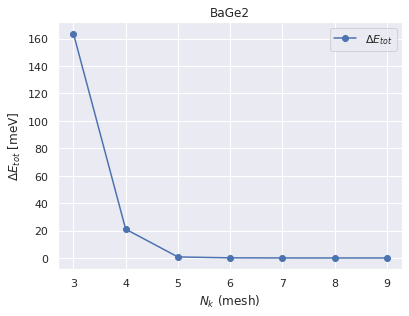

\begin{longtable}{llrr}
\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                         \\
\midrule
\endfirsthead

\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                         \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
2  &  (2x2x2) &         -97.659 &                     NaN \\
3  &  (3x3x2) &         -97.823 &                 163.610 \\
4  &  (3x4x3) &         -97.802 &                  21.020 \\
5  &  (4x5x3) &         -97.801 &                   0.762 \\
6  &  (5x6x4) &         -97.801 &                   0.116 \\
7  &  (5x7x4) &         -97.801 &                   0.012 \\
8  &  (6x8x5) &         -97.801 &                   0.000 \\
9  &  (7x9x5) &         -97.801 &                   0.004 \\
\end{longtable}



,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-110.702367,NaN
3,(3x3x2),-110.810483,108.11678
4,(3x4x3),-110.807886,2.597
5,(4x5x3),-110.808417,0.5302
6,(5x6x4),-110.808362,0.05513
7,(5x7x4),-110.808366,0.00469
8,(6x8x5),-110.808363,0.00355
9,(7x9x5),NaN,NaN


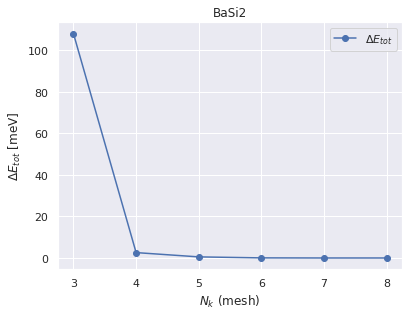

\begin{longtable}{llrr}
\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                         \\
\midrule
\endfirsthead

\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                         \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
2  &  (2x2x2) &        -110.702 &                     NaN \\
3  &  (3x3x2) &        -110.810 &                 108.117 \\
4  &  (3x4x3) &        -110.808 &                   2.597 \\
5  &  (4x5x3) &        -110.808 &                   0.530 \\
6  &  (5x6x4) &        -110.808 &                   0.055 \\
7  &  (5x7x4) &        -110.808 &                   0.005 \\
8  &  (6x8x5) &        -110.808 &                   0.004 \\
9  &  (7x9x5) &             NaN &                     NaN \\
\end{longtable}



,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-111.618335,NaN
3,(3x3x2),-111.843047,224.71241
4,(3x4x3),-111.821190,21.85711
5,(4x5x3),-111.824068,2.87783
6,(5x6x4),-111.823723,0.34462
7,(5x7x4),-111.823765,0.04142
8,(6x8x5),-111.823779,0.01417
9,(7x9x5),-111.823770,0.0094


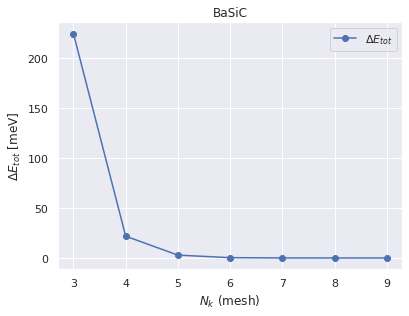

\begin{longtable}{llrr}
\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                         \\
\midrule
\endfirsthead

\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                         \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
2  &  (2x2x2) &        -111.618 &                     NaN \\
3  &  (3x3x2) &        -111.843 &                 224.712 \\
4  &  (3x4x3) &        -111.821 &                  21.857 \\
5  &  (4x5x3) &        -111.824 &                   2.878 \\
6  &  (5x6x4) &        -111.824 &                   0.345 \\
7  &  (5x7x4) &        -111.824 &                   0.041 \\
8  &  (6x8x5) &        -111.824 &                   0.014 \\
9  &  (7x9x5) &        -111.824 &                   0.009 \\
\end{longtable}



,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-106.659867,NaN
3,(3x3x2),-106.944075,284.20792
4,(3x4x3),-106.910051,34.02384
5,(4x5x3),-106.916444,6.39294
6,(5x6x4),-106.915498,0.94637
7,(5x7x4),-106.915705,0.20702
8,(6x8x5),-106.915683,0.02226
9,(7x9x5),-106.915690,0.00735


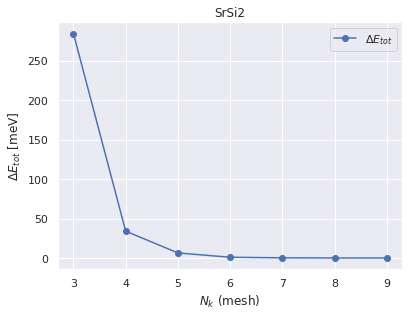

\begin{longtable}{llrr}
\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                         \\
\midrule
\endfirsthead

\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] &  \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                         \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
2  &  (2x2x2) &        -106.660 &                     NaN \\
3  &  (3x3x2) &        -106.944 &                 284.208 \\
4  &  (3x4x3) &        -106.910 &                  34.024 \\
5  &  (4x5x3) &        -106.916 &                   6.393 \\
6  &  (5x6x4) &        -106.915 &                   0.946 \\
7  &  (5x7x4) &        -106.916 &                   0.207 \\
8  &  (6x8x5) &        -106.916 &                   0.022 \\
9  &  (7x9x5) &        -106.916 &                   0.007 \\
\end{longtable}



In [5]:
kpoints = np.arange(2,10)
mesh = ['(2x2x2)', '(3x3x2)', '(3x4x3)', '(4x5x3)', 
      '(5x6x4)', '(5x7x4)', '(6x8x5)', '(7x9x5)']

for folder in folders:
    
    thisdir = '../Bulk/' + folder + '/convergence_Results'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    data = readEnergyFromFile(filepaths, filenames)
    
    
    energy = pd.DataFrame({"Nk": kpoints, "mesh": mesh, "$E_{tot}$ [eV]": data['ktest.txt']})
    energy.set_index('Nk', inplace=True, drop=True)
    
    diff = []
    diff.append('NaN')
    for i in range(1, len(data['ktest.txt'])):
        temp_value = (abs(data['ktest.txt'][i] - data['ktest.txt'][i-1])*1000)
        diff.append((temp_value))
    
    energy['$\Delta E_{tot}$ [meV]'] = diff
    display(energy)
    
    plt.plot(kpoints[1:], energy['$\Delta E_{tot}$ [meV]'][1:], "-o")
    plt.legend(["$\Delta E_{tot}$"])
    plt.title(folder)
    plt.xlabel("$N_k$ (mesh)")
    plt.ylabel("$\Delta E_{tot}$ [meV]")
    plt.show()
    
    energy[["$E_{tot}$ [eV]", '$\Delta E_{tot}$ [meV]']] = energy[["$E_{tot}$ [eV]", '$\Delta E_{tot}$ [meV]']].astype(float).round(roundoff)
    print(energy.to_latex(index = True, multirow = True, longtable = True)) 
    

## Relaxation

In [6]:
from ase import io
from tabulate import tabulate 
#from ase.io.vasp import read_vasp

# Read crystal structure from POSCAR
folders = ['BaGe2', 'BaSi2', 'BaSiC', 'SrSi2']
functionals = ['DFT-D3', 'LDA', 'PBE', 'rev-vdW-DF2', 'vdW-opt88']
file = 'CONTCAR'
structure = {}

for folder in folders:
    print(folder)
    tmp = {}
    tmp['Functional'] = []
    tmp['a [Å]'] = []
    tmp['b [Å]'] = []
    tmp['c [Å]'] = []
    for functional in functionals:
        thisdir = '../Bulk/' + folder + '/Relax/' + functional + '/'
        lattice = read_atoms(thisdir + file)
        tmp['Functional'].append(functional)
        tmp['a [Å]'].append(lattice[0])
        tmp['b [Å]'].append(lattice[1])
        tmp['c [Å]'].append(lattice[2])

    structure[folder] = pd.DataFrame(tmp)
    structure[folder]['V [Å$^3$]'] = structure[folder]['a [Å]']*structure[folder]['b [Å]']*structure[folder]['c [Å]']
    #structure[folder] = structure[folder].style.set_caption(folder)
    # displaying the DataFrame 
    #print(tabulate(structure[folder], tablefmt = 'latex')) 
    display(structure[folder])
    structure[folder][['a [Å]', 'b [Å]', 'c [Å]', 'V [Å$^3$]']] = structure[folder][['a [Å]', 'b [Å]', 'c [Å]', 'V [Å$^3$]']].astype(float).round(roundoff)
    print(structure[folder].to_latex(index = False, multirow = True, longtable = True)) 
    

BaGe2


,Functional,a [Å],b [Å],c [Å],V [Å$^3$]
0,DFT-D3,9.137189,6.828004,11.632496,725.737036
1,LDA,8.907029,6.700357,11.378664,679.081769
2,PBE,9.272917,6.882360,11.740163,749.252000
3,rev-vdW-DF2,9.091647,6.832073,11.629878,722.387486
4,vdW-opt88,9.170782,6.872860,11.697717,737.301177


\begin{longtable}{lrrrr}
\toprule
 Functional &  a [Å] &  b [Å] &  c [Å] &  V [Å\$\textasciicircum 3\$] \\
\midrule
\endfirsthead

\toprule
 Functional &  a [Å] &  b [Å] &  c [Å] &  V [Å\$\textasciicircum 3\$] \\
\midrule
\endhead
\midrule
\multicolumn{5}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
     DFT-D3 &  9.137 &  6.828 & 11.632 &    725.737 \\
        LDA &  8.907 &  6.700 & 11.379 &    679.082 \\
        PBE &  9.273 &  6.882 & 11.740 &    749.252 \\
rev-vdW-DF2 &  9.092 &  6.832 & 11.630 &    722.387 \\
  vdW-opt88 &  9.171 &  6.873 & 11.698 &    737.301 \\
\end{longtable}

BaSi2


,Functional,a [Å],b [Å],c [Å],V [Å$^3$]
0,DFT-D3,8.947759,6.709403,11.492224,689.925628
1,LDA,8.759012,6.604187,11.284017,652.736987
2,PBE,9.054805,6.764395,11.588125,709.775839
3,rev-vdW-DF2,8.905835,6.725852,11.505485,689.170811
4,vdW-opt88,8.968362,6.761316,11.577124,702.012808


\begin{longtable}{lrrrr}
\toprule
 Functional &  a [Å] &  b [Å] &  c [Å] &  V [Å\$\textasciicircum 3\$] \\
\midrule
\endfirsthead

\toprule
 Functional &  a [Å] &  b [Å] &  c [Å] &  V [Å\$\textasciicircum 3\$] \\
\midrule
\endhead
\midrule
\multicolumn{5}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
     DFT-D3 &  8.948 &  6.709 & 11.492 &    689.926 \\
        LDA &  8.759 &  6.604 & 11.284 &    652.737 \\
        PBE &  9.055 &  6.764 & 11.588 &    709.776 \\
rev-vdW-DF2 &  8.906 &  6.726 & 11.505 &    689.171 \\
  vdW-opt88 &  8.968 &  6.761 & 11.577 &    702.013 \\
\end{longtable}

BaSiC


,Functional,a [Å],b [Å],c [Å],V [Å$^3$]
0,DFT-D3,8.656906,6.132981,11.342847,602.221731
1,LDA,8.608901,5.771292,11.361807,564.505473
2,PBE,8.953261,6.085272,11.474697,625.176235
3,rev-vdW-DF2,8.514750,6.129121,11.500070,600.164926
4,vdW-opt88,8.533800,6.217044,11.473937,608.749813


\begin{longtable}{lrrrr}
\toprule
 Functional &  a [Å] &  b [Å] &  c [Å] &  V [Å\$\textasciicircum 3\$] \\
\midrule
\endfirsthead

\toprule
 Functional &  a [Å] &  b [Å] &  c [Å] &  V [Å\$\textasciicircum 3\$] \\
\midrule
\endhead
\midrule
\multicolumn{5}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
     DFT-D3 &  8.657 &  6.133 & 11.343 &    602.222 \\
        LDA &  8.609 &  5.771 & 11.362 &    564.505 \\
        PBE &  8.953 &  6.085 & 11.475 &    625.176 \\
rev-vdW-DF2 &  8.515 &  6.129 & 11.500 &    600.165 \\
  vdW-opt88 &  8.534 &  6.217 & 11.474 &    608.750 \\
\end{longtable}

SrSi2


,Functional,a [Å],b [Å],c [Å],V [Å$^3$]
0,DFT-D3,8.573761,6.413545,11.003438,605.059318
1,LDA,8.417969,6.306624,10.809745,573.878202
2,PBE,8.654407,6.470905,11.102183,621.742711
3,rev-vdW-DF2,8.568593,6.421729,11.013126,605.999228
4,vdW-opt88,8.573534,6.463686,11.046404,612.154489


\begin{longtable}{lrrrr}
\toprule
 Functional &  a [Å] &  b [Å] &  c [Å] &  V [Å\$\textasciicircum 3\$] \\
\midrule
\endfirsthead

\toprule
 Functional &  a [Å] &  b [Å] &  c [Å] &  V [Å\$\textasciicircum 3\$] \\
\midrule
\endhead
\midrule
\multicolumn{5}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
     DFT-D3 &  8.574 &  6.414 & 11.003 &    605.059 \\
        LDA &  8.418 &  6.307 & 10.810 &    573.878 \\
        PBE &  8.654 &  6.471 & 11.102 &    621.743 \\
rev-vdW-DF2 &  8.569 &  6.422 & 11.013 &    605.999 \\
  vdW-opt88 &  8.574 &  6.464 & 11.046 &    612.154 \\
\end{longtable}



## Bond Lengths

In [7]:
from pymatgen.core.structure import Structure
from pymatgen.analysis.local_env import MinimumDistanceNN

#print(lattice)
f = open(thisdir+file, "r")
N = len(f.readlines())
f.close()
df = pd.read_table(thisdir+file, 
                   skiprows=list(np.arange(8)) + list(np.arange(33,N)), 
                   names=['x', 'y', 'z'],
                   delim_whitespace=True,
                  )

x = df['x'].tolist()
y = df['y'].tolist()
z = df['z'].tolist()
cord= np.array([x,y,z]).T

sr = 8*['Sr']
si = 16*['Si']
srsi2 = sr + si
latt = [[lattice[0], 0, 0], [0, lattice[1], 0], [0, 0, lattice[2]]] 
s = Structure(lattice=latt, species=srsi2, coords=cord)
s

Structure Summary
Lattice
    abc : 8.573533919674393 6.4636857099210525 11.046404361655027
 angles : 90.0 90.0 90.0
 volume : 612.1544887603256
      A : 8.573533919674393 0.0 0.0
      B : 0.0 6.4636857099210525 0.0
      C : 0.0 0.0 11.046404361655027
PeriodicSite: Sr (0.1396, 1.6159, 7.6668) [0.0163, 0.2500, 0.6941]
PeriodicSite: Sr (8.4339, 4.8478, 3.3796) [0.9837, 0.7500, 0.3059]
PeriodicSite: Sr (4.1472, 4.8478, 2.1436) [0.4837, 0.7500, 0.1941]
PeriodicSite: Sr (4.4264, 1.6159, 8.9028) [0.5163, 0.2500, 0.8059]
PeriodicSite: Sr (1.3568, 4.8478, 10.0188) [0.1583, 0.7500, 0.9070]
PeriodicSite: Sr (7.2167, 1.6159, 1.0276) [0.8417, 0.2500, 0.0930]
PeriodicSite: Sr (2.9300, 1.6159, 4.4956) [0.3417, 0.2500, 0.4070]
PeriodicSite: Sr (5.6436, 4.8478, 6.5508) [0.6583, 0.7500, 0.5930]
PeriodicSite: Si (1.6677, 0.4110, 1.6267) [0.1945, 0.0636, 0.1473]
PeriodicSite: Si (6.9059, 6.0527, 9.4197) [0.8055, 0.9364, 0.8527]
PeriodicSite: Si (2.6191, 6.0527, 7.1499) [0.3055, 0.9364, 0.6473]
Periodi

In [8]:
file = 'OUTCAR'
bonds_data = {}
for folder in ['BaGe2']:
    tmp = {}
    #tmp['Functional'] = []
    #tmp['a [Å]'] = []
    #tmp['b [Å]'] = []
    #tmp['c [Å]'] = []
    for functional in ['DFT-D3']:
        thisdir = '../Bulk/' + folder + '/Relax/' + functional + '/'
        l = read_bond_lengths(thisdir + file)
        tmp[functional] = pd.read_table(thisdir+file, skiprows=l, 
                                        delim_whitespace=False, 
                                        #header=['ion', 'x', 'y', 'z', 'NN table'],
                                       )
        #display(tmp[functional])
        print(tmp[functional])

    ion  position               nearest neighbor table
0      1  0.015  0.250  0.691-  24 3.40  18 3.40  ... 
1                               17 3.63   5 4.41  ... 
2      2  0.985  0.750  0.309-  23 3.40  17 3.40  ... 
3                               18 3.63   6 4.41  ... 
4      3  0.485  0.750  0.191-  22 3.40  20 3.40  ... 
5                               19 3.63   7 4.41  ... 
6      4  0.515  0.250  0.809-  21 3.40  19 3.40  ... 
7                               20 3.63   8 4.41  ... 
8      5  0.159  0.750  0.907-  10 3.46  13 3.46  ... 
9                               14 3.55  17 3.71  ... 
10     6  0.841  0.250  0.093-  14 3.46   9 3.46  ... 
11                              10 3.55  18 3.71  ... 
12     7  0.341  0.250  0.407-  15 3.46  12 3.46  ... 
13                              11 3.55  19 3.71  ... 
14     8  0.659  0.750  0.593-  11 3.46  16 3.46  ... 
15                              15 3.55  20 3.71  ... 
16     9  0.194  0.073  0.147-  14 2.41  21 2.41  ... 
17    10  

## Energy Calculations

### Extracting Energy calculation for single atoms

Assigning the energy values for the single atom 

In [9]:
thisdir = '../atom_Energy'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)
atom = read_table(filepaths, filenames)

energy_dic = {}

"""
barium = data['barium.txt']
silicon = data['silicon.txt']
carbon = data['carbon.txt']

basi2_atoms = 4*barium[0] + 8*silicon[0]
basi2_crystal = 2*barium[1] + silicon[2]
basi2_cluster = 8*barium[0] + 4*silicon[1]
"""

for key in atom.keys():
    atom[key] = atom[key].rename(columns={'E0':'Atom Energy [eV]'})
    title = re.findall(r'^([\w]+)', key)[0]
    energy_dic[key] = atom[key].copy()
    atom[key] = atom[key].style.set_caption(title)
    

    display(atom[key])

,Functional,Atom Energy [eV]
0,DFT-D3,-0.065906
1,LDA,-0.041244
2,PBE,-0.041244
3,rev-vdW-DF2,1.281009
4,vdW-DF-cx,1.135240
5,vdW-opt88,1.296931


,Functional,Atom Energy [eV]
0,DFT-D3,-0.016457
1,LDA,-0.015458
2,PBE,-0.015458
3,rev-vdW-DF2,0.288885
4,vdW-DF-cx,-0.127312
5,vdW-opt88,0.072468


,Functional,Atom Energy [eV]
0,DFT-D3,0.014107
1,LDA,0.021283
2,PBE,0.021283
3,rev-vdW-DF2,0.144176
4,vdW-DF-cx,-0.423158
5,vdW-opt88,-0.121097


,Functional,Atom Energy [eV]
0,DFT-D3,-0.013042
1,LDA,-0.011861
2,PBE,-0.011861
3,rev-vdW-DF2,0.425253
4,vdW-DF-cx,0.080067
5,vdW-opt88,0.261595


,Functional,Atom Energy [eV]
0,DFT-D3,-0.084433
1,LDA,-0.071189
2,PBE,-0.071189
3,rev-vdW-DF2,1.298651
4,vdW-DF-cx,1.173315
5,vdW-opt88,1.329995


### Extracting Energy calculation for solid structures
Assigning the energy values for the crystal calculation

In [10]:
thisdir = '../solid_Energy'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)
solid = read_table(filepaths, filenames)

solids_atom = {'barium.txt': 2, 'silicon.txt': 8, 'carbon.txt': 4, 
              'germanium.txt': 4, 'strontium.txt': 4}

for key in solid.keys():
    solid[key] = solid[key].rename(columns={'E0':'Solid Energy [eV]'})
    energy_dic[key]['Solid Energy/atom [eV]'] = (solid[key]['Solid Energy [eV]']/solids_atom[key]).copy()
    title = re.findall(r'^([\w]+)', key)[0]
    solid[key] = solid[key].style.set_caption(title)
    

    display(solid[key])

,Functional,Solid Energy [eV]
0,DFT-D3,-0.065906
1,LDA,-0.041244
2,PBE,-0.041244
3,rev-vdW-DF2,1.281009
4,vdW-DF-cx,1.135240
5,vdW-opt88,1.296931


,Functional,Solid Energy [eV]
0,DFT-D3,-0.016457
1,LDA,-0.015458
2,PBE,-0.015458
3,rev-vdW-DF2,0.288885
4,vdW-DF-cx,-0.127312
5,vdW-opt88,0.072468


,Functional,Solid Energy [eV]
0,DFT-D3,0.014107
1,LDA,0.021283
2,PBE,0.021283
3,rev-vdW-DF2,0.144176
4,vdW-DF-cx,-0.423158
5,vdW-opt88,-0.121097


,Functional,Solid Energy [eV]
0,DFT-D3,-0.013042
1,LDA,-0.011861
2,PBE,-0.011861
3,rev-vdW-DF2,0.425253
4,vdW-DF-cx,0.080067
5,vdW-opt88,0.261595


,Functional,Solid Energy [eV]
0,DFT-D3,-0.084433
1,LDA,-0.071189
2,PBE,-0.071189
3,rev-vdW-DF2,1.298651
4,vdW-DF-cx,1.173315
5,vdW-opt88,1.329995


In [11]:
for key in energy_dic.keys():
    #title = re.findall(r'^([\w]+)', key)[0]
    #energy_dic[key] = energy_dic[key].style.set_caption(title)
    
    display(energy_dic[key])

,Functional,Atom Energy [eV],Solid Energy/atom [eV]
0,DFT-D3,-0.065906,-0.032953
1,LDA,-0.041244,-0.020622
2,PBE,-0.041244,-0.020622
3,rev-vdW-DF2,1.281009,0.640504
4,vdW-DF-cx,1.135240,0.567620
5,vdW-opt88,1.296931,0.648466


,Functional,Atom Energy [eV],Solid Energy/atom [eV]
0,DFT-D3,-0.016457,-0.002057
1,LDA,-0.015458,-0.001932
2,PBE,-0.015458,-0.001932
3,rev-vdW-DF2,0.288885,0.036111
4,vdW-DF-cx,-0.127312,-0.015914
5,vdW-opt88,0.072468,0.009059


,Functional,Atom Energy [eV],Solid Energy/atom [eV]
0,DFT-D3,0.014107,0.003527
1,LDA,0.021283,0.005321
2,PBE,0.021283,0.005321
3,rev-vdW-DF2,0.144176,0.036044
4,vdW-DF-cx,-0.423158,-0.105789
5,vdW-opt88,-0.121097,-0.030274


,Functional,Atom Energy [eV],Solid Energy/atom [eV]
0,DFT-D3,-0.013042,-0.003261
1,LDA,-0.011861,-0.002965
2,PBE,-0.011861,-0.002965
3,rev-vdW-DF2,0.425253,0.106313
4,vdW-DF-cx,0.080067,0.020017
5,vdW-opt88,0.261595,0.065399


,Functional,Atom Energy [eV],Solid Energy/atom [eV]
0,DFT-D3,-0.084433,-0.021108
1,LDA,-0.071189,-0.017797
2,PBE,-0.071189,-0.017797
3,rev-vdW-DF2,1.298651,0.324663
4,vdW-DF-cx,1.173315,0.293329
5,vdW-opt88,1.329995,0.332499


### Extracting Energy data for bulk structures

In [12]:
energies = {}
for folder in folders:
    thisdir = '../Bulk/' + folder + '/Etot/'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    tmp_dic = read_table(filepaths, [folder])
    #tmp_dic[folder]['$E_{total}$ [eV]'] = tmp_dic[folder]['E0']
    tmp_dic[folder]['E0'] = tmp_dic[folder]['E0']/24
    tmp_dic[folder] = tmp_dic[folder].rename(columns={"E0": "$E_{tot}/$atom [eV]"})
    energies[folder] = tmp_dic[folder].copy()
    tmp_dic[folder] = tmp_dic[folder].style.set_caption(folder)
    display(tmp_dic[folder])

,Functional,$E_{tot}/$atom [eV]
0,DFT-D3,-4.340727
1,LDA,-4.751636
2,PBE,-4.170623
3,rev-vdW-DF2,-3.566513
4,vdW-opt88,-3.657560


,Functional,$E_{tot}/$atom [eV]
0,DFT-D3,-4.773656
1,LDA,-5.104749
2,PBE,-4.617331
3,rev-vdW-DF2,-4.060447
4,vdW-opt88,-4.172889


,Functional,$E_{tot}/$atom [eV]
0,DFT-D3,-5.473033
1,LDA,-5.931542
2,PBE,-5.348677
3,rev-vdW-DF2,-4.833246
4,vdW-opt88,-4.986441


,Functional,$E_{tot}/$atom [eV]
0,DFT-D3,-4.683364
1,LDA,-4.975903
2,PBE,-4.506052
3,rev-vdW-DF2,-3.908902
4,vdW-opt88,-4.011170


## Formation Energy
We also calculate formation energy ($\Delta H_f$) of these compounds with respect to their elemental standard to model the thermodynamic function; this is important information for synthesis of the material. Enthalpy of formation ($\Delta H_f$) is calculated by using following equation:

$\Delta H_f$(BaSi$_2$) = E$_{tot}$(BaSi$_2$) - $\mu_{Ba}$ - 2$\mu_{Si}$

Here, $\Delta H_f$(BaSi$_2$) is the enthalpy of formation of compound BaSi$_2$. E$_{tot}$ (BaSi$_2$) is the total energy of the compound BaSi$_2$. $\mu_{Ba}$ and $\mu_{Si}$ represent the chemical potential of respective element (Ba and Si), i.e., a ground state total energy of each elemental solid per atom.

Mention that this formation energy is more like decomposition energy,  rather than considering full analyses of the chemical potentials of the elements. 


- dH = $E_{\text{coh}}$ if using $\mu$ = energy of sole atoms; 			(meV/atom)

- dH = dHd = decomposition energy if using $\mu$ = energy of solid   	(meV/atom)

In [13]:
dic ={
    'BaGe2': ['barium.txt', 'germanium.txt'], 
    'BaSi2': ['barium.txt', 'silicon.txt'],
    'BaSiC': ['barium.txt', 'silicon.txt', 'carbon.txt'],
    'SrSi2': ['strontium.txt', 'silicon.txt']
}

col1 = 'Atom Energy [eV]'
col2 = 'Solid Energy/atom [eV]'
for folder in folders:
    if folder != 'BaSiC':
        tmp1 = energy_dic[dic[folder][0]][col1] + 2*energy_dic[dic[folder][1]][col1]
        tmp2 = energy_dic[dic[folder][0]][col2] + 2*energy_dic[dic[folder][1]][col2]
    else:
        tmp1 = energy_dic[dic[folder][0]][col1] + energy_dic[dic[folder][1]][col1] + energy_dic[dic[folder][2]][col1]
        tmp2 = energy_dic[dic[folder][0]][col2] + energy_dic[dic[folder][1]][col2] + energy_dic[dic[folder][2]][col2]
        
    energies[folder]['$E_{coh}$ [eV]'] = energies[folder]['$E_{tot}/$atom [eV]'] - tmp1
    energies[folder]['$dH_d$ [eV]'] = energies[folder]['$E_{tot}/$atom [eV]'] - tmp2
    
    print(folder)
    display(energies[folder])
    energies[folder][['$E_{tot}/$atom [eV]', '$E_{coh}$ [eV]', '$dH_d$ [eV]']] = energies[folder][['$E_{tot}/$atom [eV]', '$E_{coh}$ [eV]', '$dH_d$ [eV]']].astype(float).round(roundoff)
    print(energies[folder].to_latex(index = False, multirow = True, longtable = True)) 
    

BaGe2


,Functional,$E_{tot}/$atom [eV],$E_{coh}$ [eV],$dH_d$ [eV]
0,DFT-D3,-4.340727,-4.248737,-4.301253
1,LDA,-4.751636,-4.686671,-4.725084
2,PBE,-4.170623,-4.105658,-4.144071
3,rev-vdW-DF2,-3.566513,-5.698028,-4.419644
4,vdW-opt88,-3.657560,-4.952933,-4.265213


\begin{longtable}{lrrr}
\toprule
 Functional &  \$E\_\{tot\}/\$atom [eV] &  \$E\_\{coh\}\$ [eV] &  \$dH\_d\$ [eV] \\
\midrule
\endfirsthead

\toprule
 Functional &  \$E\_\{tot\}/\$atom [eV] &  \$E\_\{coh\}\$ [eV] &  \$dH\_d\$ [eV] \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
     DFT-D3 &               -4.341 &          -4.249 &       -4.301 \\
        LDA &               -4.752 &          -4.687 &       -4.725 \\
        PBE &               -4.171 &          -4.106 &       -4.144 \\
rev-vdW-DF2 &               -3.567 &          -5.698 &       -4.420 \\
  vdW-opt88 &               -3.658 &          -4.953 &       -4.265 \\
\end{longtable}

BaSi2


,Functional,$E_{tot}/$atom [eV],$E_{coh}$ [eV],$dH_d$ [eV]
0,DFT-D3,-4.773656,-4.674836,-4.736588
1,LDA,-5.104749,-5.032589,-5.080263
2,PBE,-4.617331,-4.545171,-4.592845
3,rev-vdW-DF2,-4.060447,-5.919225,-4.773173
4,vdW-opt88,-4.172889,-5.053506,-4.708681


\begin{longtable}{lrrr}
\toprule
 Functional &  \$E\_\{tot\}/\$atom [eV] &  \$E\_\{coh\}\$ [eV] &  \$dH\_d\$ [eV] \\
\midrule
\endfirsthead

\toprule
 Functional &  \$E\_\{tot\}/\$atom [eV] &  \$E\_\{coh\}\$ [eV] &  \$dH\_d\$ [eV] \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
     DFT-D3 &               -4.774 &          -4.675 &       -4.737 \\
        LDA &               -5.105 &          -5.033 &       -5.080 \\
        PBE &               -4.617 &          -4.545 &       -4.593 \\
rev-vdW-DF2 &               -4.060 &          -5.919 &       -4.773 \\
  vdW-opt88 &               -4.173 &          -5.054 &       -4.709 \\
\end{longtable}

BaSiC


,Functional,$E_{tot}/$atom [eV],$E_{coh}$ [eV],$dH_d$ [eV]
0,DFT-D3,-5.473033,-5.404777,-5.441550
1,LDA,-5.931542,-5.896123,-5.914309
2,PBE,-5.348677,-5.313258,-5.331444
3,rev-vdW-DF2,-4.833246,-6.547315,-5.545905
4,vdW-opt88,-4.986441,-5.571211,-5.432357


\begin{longtable}{lrrr}
\toprule
 Functional &  \$E\_\{tot\}/\$atom [eV] &  \$E\_\{coh\}\$ [eV] &  \$dH\_d\$ [eV] \\
\midrule
\endfirsthead

\toprule
 Functional &  \$E\_\{tot\}/\$atom [eV] &  \$E\_\{coh\}\$ [eV] &  \$dH\_d\$ [eV] \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
     DFT-D3 &               -5.473 &          -5.405 &       -5.442 \\
        LDA &               -5.932 &          -5.896 &       -5.914 \\
        PBE &               -5.349 &          -5.313 &       -5.331 \\
rev-vdW-DF2 &               -4.833 &          -6.547 &       -5.546 \\
  vdW-opt88 &               -4.986 &          -5.571 &       -5.432 \\
\end{longtable}

SrSi2


,Functional,$E_{tot}/$atom [eV],$E_{coh}$ [eV],$dH_d$ [eV]
0,DFT-D3,-4.683364,-4.566017,-4.658141
1,LDA,-4.975903,-4.873798,-4.954241
2,PBE,-4.506052,-4.403947,-4.484390
3,rev-vdW-DF2,-3.908902,-5.785323,-4.305786
4,vdW-opt88,-4.011170,-4.929862,-4.272671


\begin{longtable}{lrrr}
\toprule
 Functional &  \$E\_\{tot\}/\$atom [eV] &  \$E\_\{coh\}\$ [eV] &  \$dH\_d\$ [eV] \\
\midrule
\endfirsthead

\toprule
 Functional &  \$E\_\{tot\}/\$atom [eV] &  \$E\_\{coh\}\$ [eV] &  \$dH\_d\$ [eV] \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
     DFT-D3 &               -4.683 &          -4.566 &       -4.658 \\
        LDA &               -4.976 &          -4.874 &       -4.954 \\
        PBE &               -4.506 &          -4.404 &       -4.484 \\
rev-vdW-DF2 &               -3.909 &          -5.785 &       -4.306 \\
  vdW-opt88 &               -4.011 &          -4.930 &       -4.273 \\
\end{longtable}



### Interlayer Energy calculations
Extracting the data from the text files and visualize the data in plots

#### Graphite

Text(0, 0.5, 'Energy/atom [ev]')

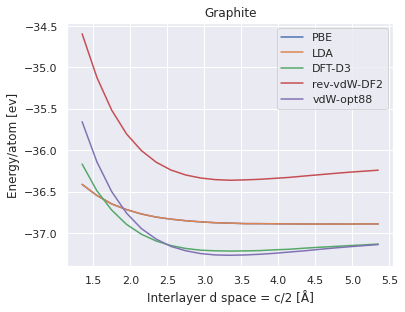

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/Graphite/DFT-D3.txt'
rev = '../Layers/L_L_distance/Graphite/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/Graphite/PBE.txt'
lda = '../Layers/L_L_distance/Graphite/LDA.txt'
vdw = '../Layers/L_L_distance/Graphite/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)

# The starting distance between layers
origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
x += origo
n = 4 # Number of atoms
plt.plot(x, pbe['energy'])
plt.plot(x, lda['energy'])
plt.plot(x, dft['energy'])
plt.plot(x, rev['energy'])
plt.plot(x, vdw['energy'])
plt.legend(['PBE', 'LDA', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('Graphite')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')

#### BaSi2

Text(0, 0.5, 'Energy/atom [ev]')

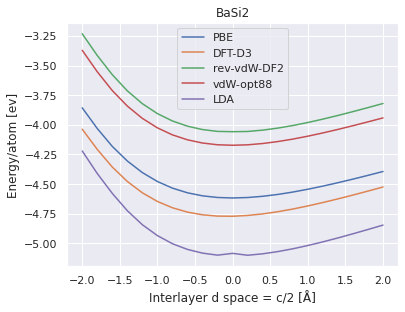

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/BaSi2/Bulk/DFT-D3.txt'
rev = '../Layers/L_L_distance/BaSi2/Bulk/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/BaSi2/Bulk/PBE.txt'
lda = '../Layers/L_L_distance/BaSi2/Bulk/LDA.txt'
vdw = '../Layers/L_L_distance/BaSi2/Bulk/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)


# The starting distance between layers
#origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
#x += origo
n = 24 # Number of atoms
plt.plot(x, pbe['energy']/n)
plt.plot(x, dft['energy']/n)
plt.plot(x, rev['energy']/n)
plt.plot(x, vdw['energy']/n)
plt.plot(x, lda['energy']/n)
plt.legend(['PBE', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88', 'LDA'])
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')


## Birch-Murnaghan Equation

In [16]:
bm = {}

for folder in folders:
    # Lattice parameter starting point
    a = structure[folder]['a [Å]'].tolist()
    b = structure[folder]['b [Å]'].tolist()
    c = structure[folder]['c [Å]'].tolist()
    
    thisdir = '../Bulk/' + folder + '/Birch-Murnaghan/'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    tmp_dic = read_table(filepaths, filenames)
    
    j = 0
    for filename in filenames:
        column = filename.replace('.txt', '')
        tmp_dic[filename]['E0'] = tmp_dic[filename]['E0']
        tmp_dic[filename] = tmp_dic[filename].rename(columns={"E0": column})
        tmp_dic[filename]['Functional'] = tmp_dic[filename].Functional.str.extract('(-?\d+)')
        tmp_dic[filename]['Functional'] = pd.to_numeric(tmp_dic[filename]['Functional'], downcast='integer')
        tmp_dic[filename] = tmp_dic[filename].sort_values(by=['Functional'], ascending=False)
        tmp_dic[filename] = tmp_dic[filename].reset_index(drop=True)
        tmp_dic[filename]['Functional'] = tmp_dic[filename]['Functional']*0.05 + a[j] 
        #tmp_dic[filename] = tmp_dic[filename].set_index('Functional')
        tmp_dic[filename] = tmp_dic[filename].rename(columns={"Functional": "a: " + column})
        #tmp_dic[filename].plot(x="a [Å]", y= column + "  $E_{tot}/$atom [ev]", title=folder + "\n " + column, kind='scatter')
        
        if j == 0:
            bm[folder] = tmp_dic[filename].copy()
        else:
            bm[folder]["a: " + column] = tmp_dic[filename]["a: " + column]
            bm[folder][column] = tmp_dic[filename][column]
            
        #tmp_dic[filename] = tmp_dic[filename].style.set_caption(folder)
        #display(tmp_dic[filename])
        j += 1
    
    print(folder)
    #bm[folder] = bm[folder].set_index('a [Å]')
    display(bm[folder])
    #bm[folder].plot(title=folder, ylabel='$E_{tot}/$atom [ev]')

BaGe2


,a: DFT-D3,DFT-D3,a: rev-vdW-DF2,rev-vdW-DF2,a: vdW-opt88,vdW-opt88,a: PBE,PBE,a: LDA,LDA
0,9.387,-104.055542,9.157,-85.472569,9.523,-87.657805,9.342,-99.978246,9.421,-113.887276
1,9.337,-104.099941,9.107,-85.518259,9.473,-87.702147,9.292,-100.019882,9.371,-113.940580
2,9.287,-104.135325,9.057,-85.554087,9.423,-87.737050,9.242,-100.052597,9.321,-113.983416
3,9.237,-104.161007,9.007,-85.575766,9.373,-87.762483,9.192,-100.076245,9.271,-114.014504
4,9.187,-104.172133,8.957,-85.591405,9.323,-87.775878,9.142,-100.090761,9.221,-114.033091
5,9.137,-104.177455,8.907,-85.596309,9.273,-87.781433,9.092,-100.094956,9.171,-114.039268
6,9.087,-104.171236,8.857,-85.589635,9.223,-87.775200,9.042,-100.087715,9.121,-114.032759
7,9.037,-104.153665,8.807,-85.570243,9.173,-87.757698,8.992,-100.070171,9.071,-114.011900
8,8.987,-104.123591,8.757,-85.537797,9.123,-87.728044,8.942,-100.041479,9.021,-113.976152
9,8.937,-104.080908,8.707,-85.491950,9.073,-87.684919,8.892,-100.000672,8.971,-113.925268


BaSi2


,a: DFT-D3,DFT-D3,a: rev-vdW-DF2,rev-vdW-DF2,a: vdW-opt88,vdW-opt88,a: PBE,PBE,a: LDA,LDA
0,9.198,-114.418008,9.009,-97.300954,9.305,-100.002749,9.156,-110.673928,9.218,-122.353942
1,9.148,-114.469874,8.959,-97.353580,9.255,-100.054057,9.106,-110.722345,9.168,-122.410838
2,9.098,-114.511107,8.909,-97.395340,9.205,-100.094737,9.056,-110.764382,9.118,-122.456038
3,9.048,-114.541491,8.859,-97.425854,9.155,-100.124469,9.006,-110.792690,9.068,-122.487896
4,8.998,-114.560657,8.809,-97.444741,9.105,-100.142854,8.956,-110.809912,9.018,-122.507937
5,8.948,-114.567740,8.759,-97.450731,9.055,-100.149330,8.906,-110.815948,8.968,-122.513974
6,8.898,-114.562012,8.709,-97.444522,9.005,-100.143340,8.856,-110.810026,8.918,-122.505463
7,8.848,-114.544515,8.659,-97.423260,8.955,-100.124050,8.806,-110.791510,8.868,-122.481699
8,8.798,-114.511835,8.609,-97.387596,8.905,-100.092222,8.756,-110.759958,8.818,-122.442645
9,8.748,-114.464409,8.559,-97.336519,8.855,-100.044428,8.706,-110.715068,8.768,-122.387206


BaSiC


,a: DFT-D3,DFT-D3,a: rev-vdW-DF2,rev-vdW-DF2,a: vdW-opt88,vdW-opt88,a: PBE,PBE,a: LDA,LDA
0,8.907,-131.239077,8.859,-115.865765,9.203,-119.541878,8.765,-128.201587,8.784,-142.217855
1,8.857,-131.289299,8.809,-115.918498,9.153,-119.594625,8.715,-128.259084,8.734,-142.272254
2,8.807,-131.324822,8.759,-115.958639,9.103,-119.634498,8.665,-128.304994,8.684,-142.314263
3,8.757,-131.347661,8.709,-115.985493,9.053,-119.661419,8.615,-128.338515,8.634,-142.343189
4,8.707,-131.357046,8.659,-115.998734,9.003,-119.674961,8.565,-128.359650,8.584,-142.357571
5,8.657,-131.352803,8.609,-115.997893,8.953,-119.674577,8.515,-128.368254,8.534,-142.357007
6,8.607,-131.334219,8.559,-115.982028,8.903,-119.659048,8.465,-128.363538,8.484,-142.341065
7,8.557,-131.300891,8.509,-115.950292,8.853,-119.627698,8.415,-128.337516,8.434,-142.309304
8,8.507,-131.251590,8.459,-115.902701,8.803,-119.579930,8.365,-128.303427,8.384,-142.261037
9,8.457,-131.185577,8.409,-115.838546,8.753,-119.515424,8.315,-128.254167,8.334,-142.194780


SrSi2


,a: DFT-D3,DFT-D3,a: rev-vdW-DF2,rev-vdW-DF2,a: vdW-opt88,vdW-opt88,a: PBE,PBE,a: LDA,LDA
0,8.824,-112.236504,8.668,-93.637384,8.904,-96.145198,8.819,-107.983024,8.824,-119.237418
1,8.774,-112.291559,8.618,-93.695178,8.854,-96.192531,8.769,-108.037610,8.774,-119.299137
2,8.724,-112.335951,8.568,-93.742225,8.804,-96.228955,8.719,-108.081086,8.724,-119.349177
3,8.624,-112.391375,8.518,-93.778128,8.754,-96.254026,8.669,-108.113754,8.674,-119.386477
4,8.574,-112.400735,8.468,-93.802094,8.704,-96.267435,8.619,-108.135113,8.624,-119.410772
5,8.524,-112.397217,8.418,-93.813647,8.654,-96.268083,8.569,-108.145255,8.574,-119.421676
6,8.474,-112.380100,8.368,-93.811964,8.604,-96.255398,8.519,-108.143054,8.524,-119.418170
7,8.424,-112.348936,8.318,-93.796652,8.554,-96.228835,8.469,-108.127824,8.474,-119.399210
8,8.374,-112.302909,8.268,-93.766834,8.504,-96.187879,8.419,-108.098972,8.424,-119.364268
9,8.324,-112.240977,8.218,-93.722075,8.454,-96.131304,8.369,-108.056068,8.374,-119.312274


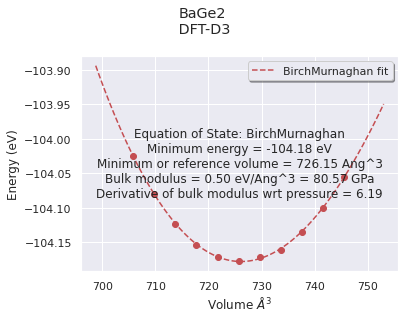

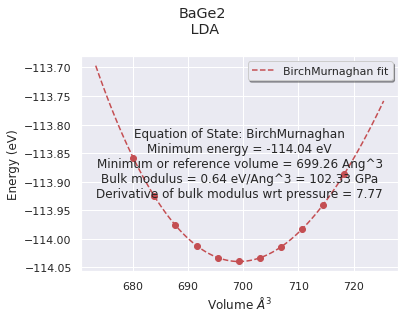

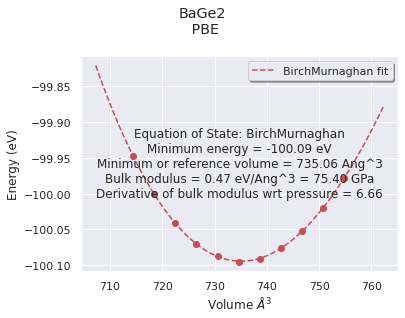

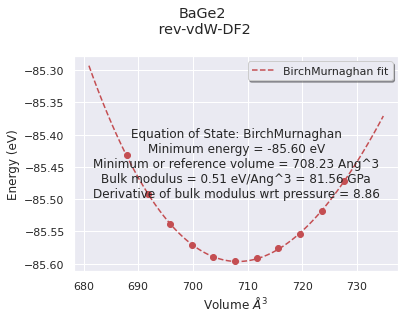

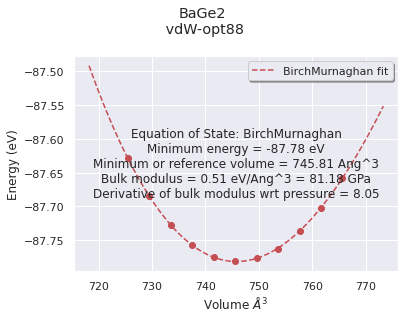

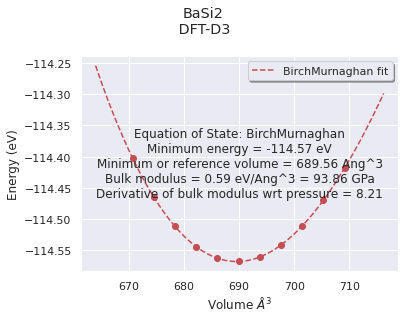

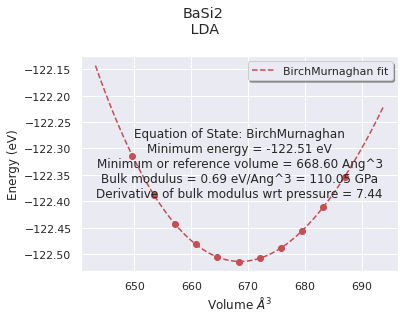

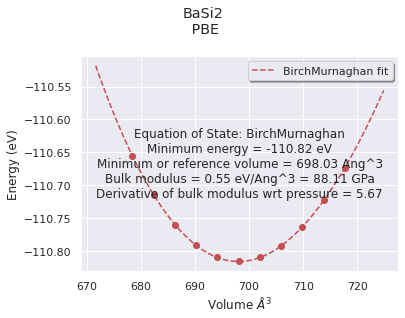

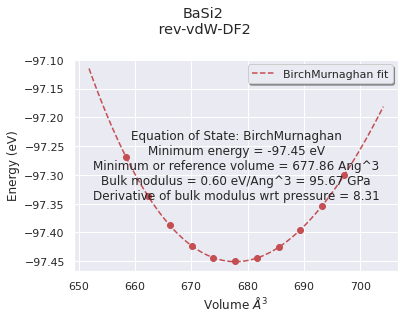

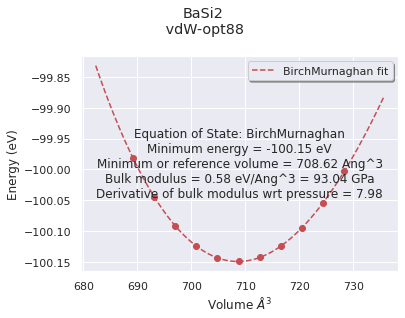

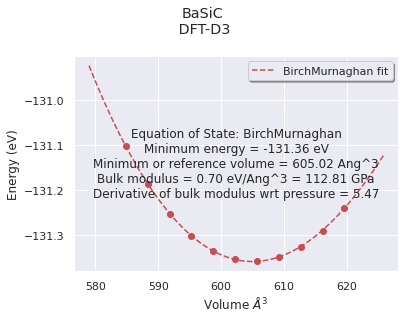

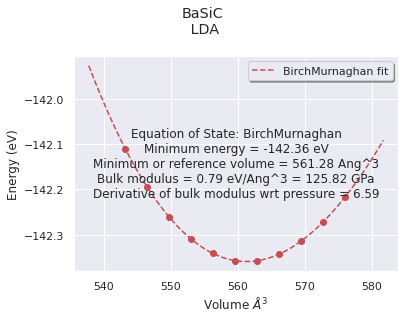

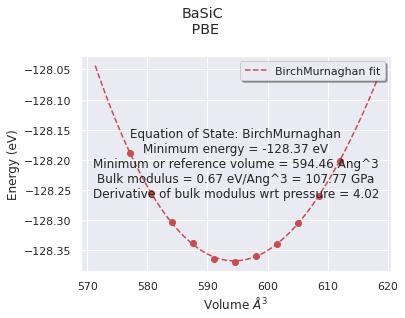

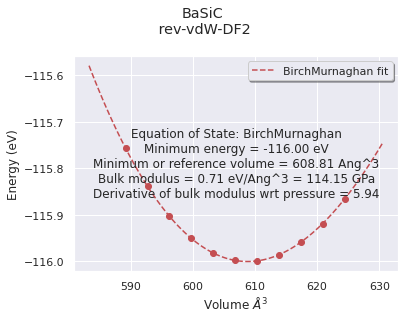

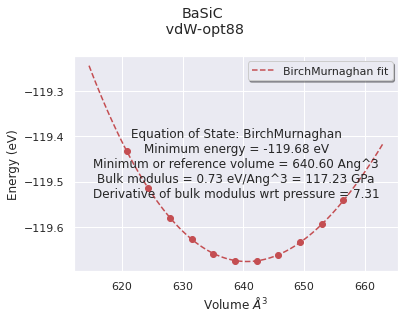

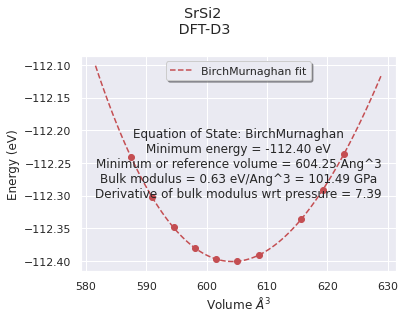

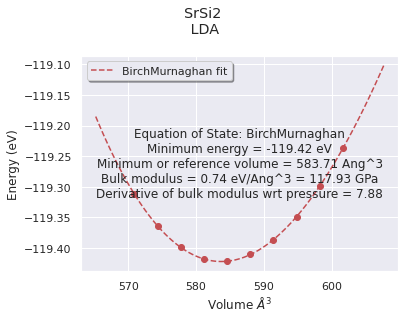

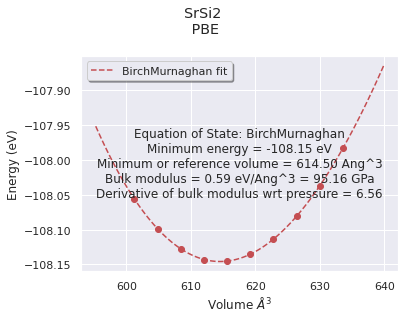

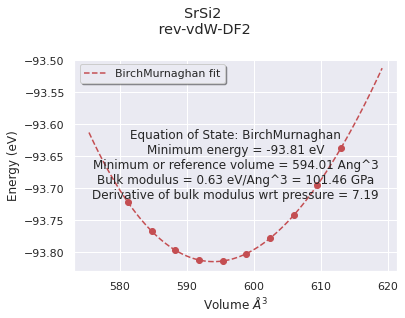

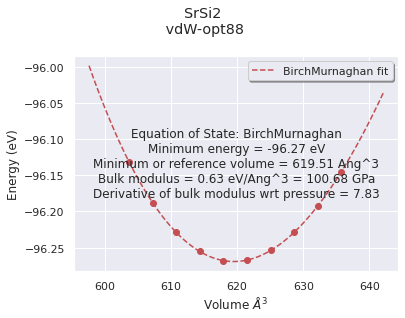

In [17]:
from pymatgen.analysis.eos import EOS

for folder in folders:
    functionals = structure[folder]['Functional'].tolist()
    b = structure[folder]['b [Å]'].tolist()
    c = structure[folder]['c [Å]'].tolist()
    i = 0
    for functional in functionals:
        a = np.array(bm[folder]['a: ' + functional].tolist())
        etot = np.array(bm[folder][functional].tolist())
        V = a*b[i]*c[i]
        birch = EOS(eos_name='birch_murnaghan')
        birch_fit = birch.fit(V, etot)
        birch_fit.plot_ax(title=folder + "\n " + functional)
        i += 1
        

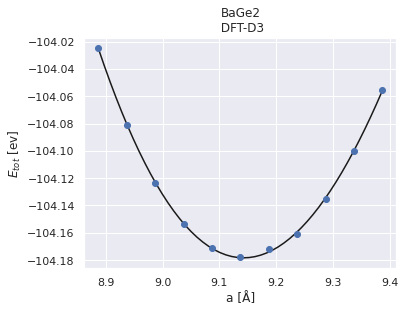

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           764.2269848867106
Optimized lattice constant [Å]:   9.142692703238318
Optimized energy [eV]:             -104.17832871904837
Optimized bulk modulus [eV/Å^3]:  0.02281636877658532
Optimized bulk modulus [GPa]:      3.65558526253961


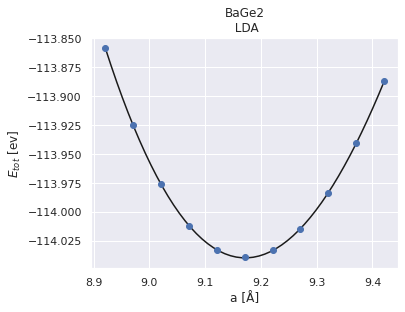

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           771.5541227657271
Optimized lattice constant [Å]:   9.171818784473988
Optimized energy [eV]:             -114.03962312386084
Optimized bulk modulus [eV/Å^3]:  0.027622488492361326
Optimized bulk modulus [GPa]:      4.425610527077835


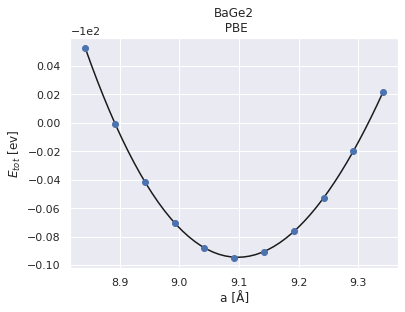

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           753.0297422294086
Optimized lattice constant [Å]:   9.097820764763716
Optimized energy [eV]:             -100.09457015836539
Optimized bulk modulus [eV/Å^3]:  0.021933151266072752
Optimized bulk modulus [GPa]:      3.5140782178971683


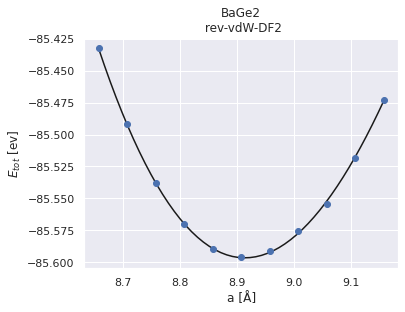

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           708.1571924586386
Optimized lattice constant [Å]:   8.913396449701475
Optimized energy [eV]:             -85.5965715209268
Optimized bulk modulus [eV/Å^3]:  0.02428311588981654
Optimized bulk modulus [GPa]:      3.890584055884105


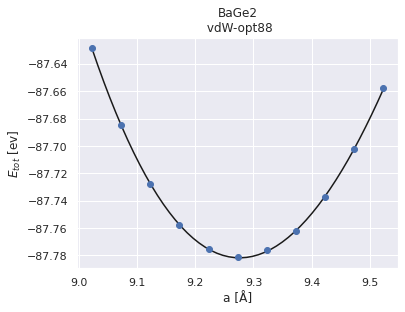

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           798.1813535098427
Optimized lattice constant [Å]:   9.276137822247833
Optimized energy [eV]:             -87.7817414382084
Optimized bulk modulus [eV/Å^3]:  0.022587161788205024
Optimized bulk modulus [GPa]:      3.618862254728921
-----------------------------------------------------------


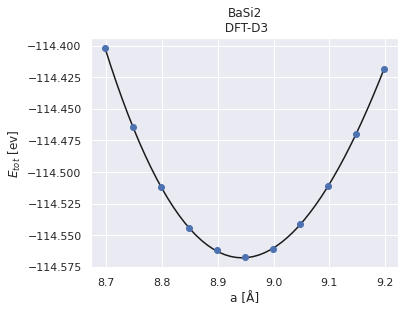

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           715.4013485356495
Optimized lattice constant [Å]:   8.943686853962896
Optimized energy [eV]:             -114.56799680238305
Optimized bulk modulus [eV/Å^3]:  0.026943070355666194
Optimized bulk modulus [GPa]:      4.316755741641791


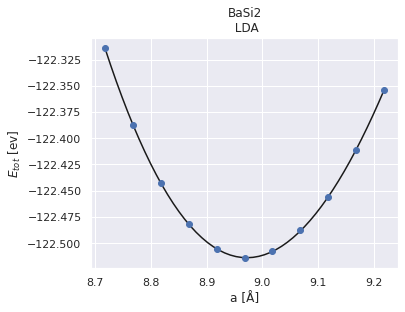

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           722.2281527731237
Optimized lattice constant [Å]:   8.972045578090876
Optimized energy [eV]:             -122.51386886807654
Optimized bulk modulus [eV/Å^3]:  0.030352369410892956
Optimized bulk modulus [GPa]:      4.8629856656017765


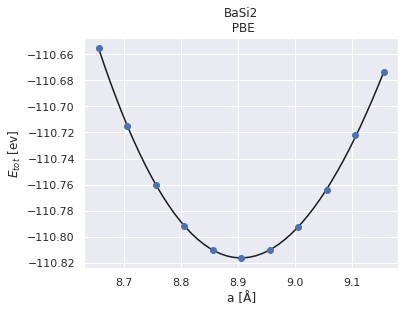

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           706.290807589207
Optimized lattice constant [Å]:   8.905558988026481
Optimized energy [eV]:             -110.81622388784223
Optimized bulk modulus [eV/Å^3]:  0.025967754584145242
Optimized bulk modulus [GPa]:      4.160492928938953


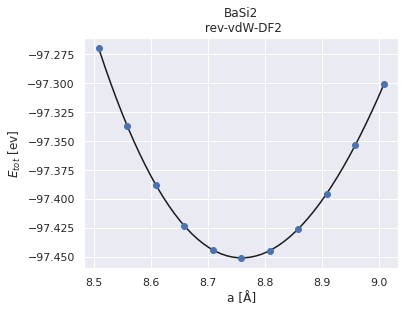

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           672.1771897508277
Optimized lattice constant [Å]:   8.759808059250599
Optimized energy [eV]:             -97.45104790657476
Optimized bulk modulus [eV/Å^3]:  0.02873209601971047
Optimized bulk modulus [GPa]:      4.603389250936085


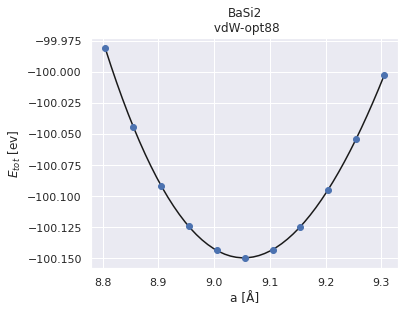

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           742.0035803767427
Optimized lattice constant [Å]:   9.053197614002357
Optimized energy [eV]:             -100.14955223055384
Optimized bulk modulus [eV/Å^3]:  0.026463849741213824
Optimized bulk modulus [GPa]:      4.239976135173692
-----------------------------------------------------------


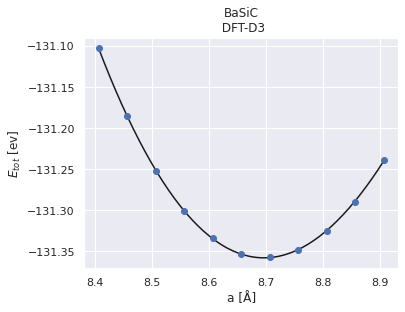

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           657.7675659324544
Optimized lattice constant [Å]:   8.696759994619265
Optimized energy [eV]:             -131.35778011636876
Optimized bulk modulus [eV/Å^3]:  0.03092336060570394
Optimized bulk modulus [GPa]:      4.954468539902658


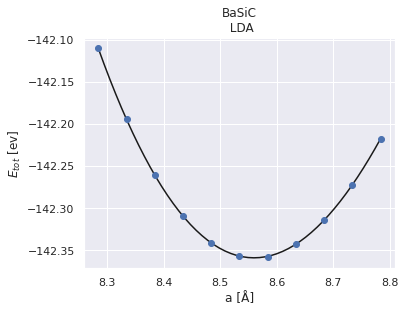

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           627.1964447332792
Optimized lattice constant [Å]:   8.559883670634287
Optimized energy [eV]:             -142.35911217125118
Optimized bulk modulus [eV/Å^3]:  0.033559365168047695
Optimized bulk modulus [GPa]:      5.376803028113588


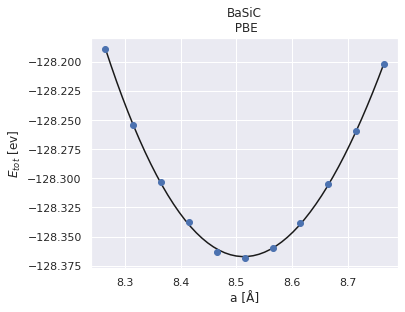

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           617.0586617346304
Optimized lattice constant [Å]:   8.51351327680008
Optimized energy [eV]:             -128.36721821066132
Optimized bulk modulus [eV/Å^3]:  0.031001192165036273
Optimized bulk modulus [GPa]:      4.966938530374925


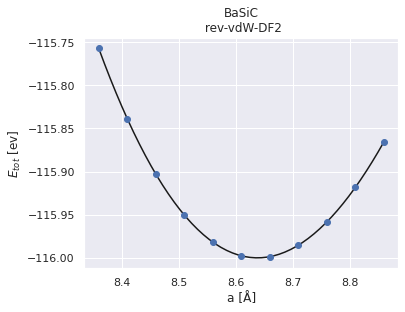

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           644.401313128959
Optimized lattice constant [Å]:   8.637448525760487
Optimized energy [eV]:             -116.00020324834233
Optimized bulk modulus [eV/Å^3]:  0.032151005343746375
Optimized bulk modulus [GPa]:      5.151158909696631


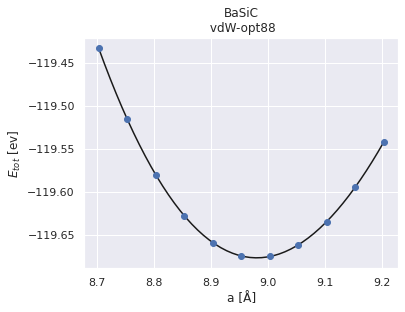

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           724.1996626481555
Optimized lattice constant [Å]:   8.980202006061566
Optimized energy [eV]:             -119.67667069497625
Optimized bulk modulus [eV/Å^3]:  0.030888088505969052
Optimized bulk modulus [GPa]:      4.948817326546481
-----------------------------------------------------------


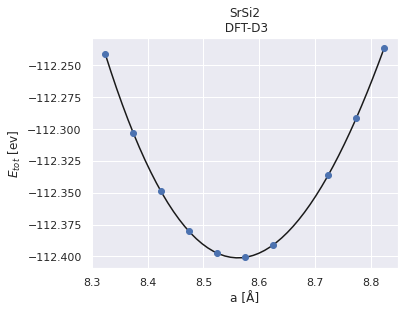

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           627.6756042916694
Optimized lattice constant [Å]:   8.562062948524707
Optimized energy [eV]:             -112.40109762786483
Optimized bulk modulus [eV/Å^3]:  0.029114123782946175
Optimized bulk modulus [GPa]:      4.664596846011362


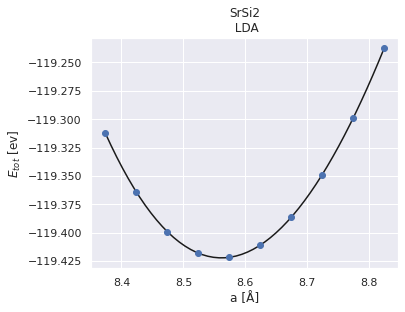

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           627.5408405845776
Optimized lattice constant [Å]:   8.561450138381
Optimized energy [eV]:             -119.42226002918386
Optimized bulk modulus [eV/Å^3]:  0.032657815415462046
Optimized bulk modulus [GPa]:      5.232358834505513


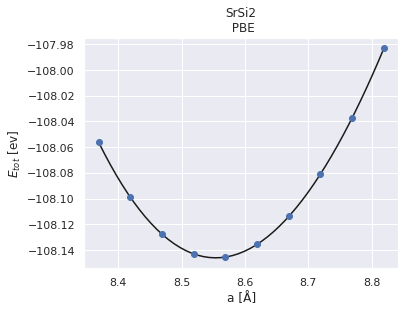

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           625.8259550256032
Optimized lattice constant [Å]:   8.553644377447462
Optimized energy [eV]:             -108.14597456273569
Optimized bulk modulus [eV/Å^3]:  0.0278324145660735
Optimized bulk modulus [GPa]:      4.459244391817633


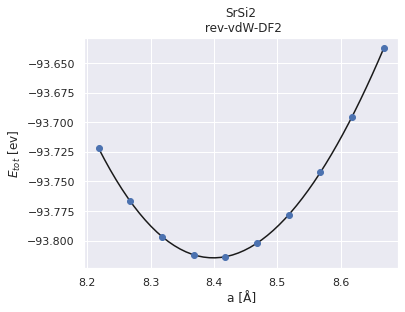

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           592.4743632814366
Optimized lattice constant [Å]:   8.398915030320774
Optimized energy [eV]:             -93.81457200279839
Optimized bulk modulus [eV/Å^3]:  0.030290295985931748
Optimized bulk modulus [GPa]:      4.853040406577193


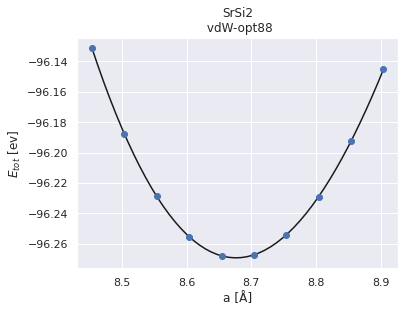

Results from the fitting:
--------------------------------------------
Optimized volume [Å^3]:           653.1528695645474
Optimized lattice constant [Å]:   8.676374309374884
Optimized energy [eV]:             -96.26934012400459
Optimized bulk modulus [eV/Å^3]:  0.028437662714455032
Optimized bulk modulus [GPa]:      4.556215835129572
-----------------------------------------------------------


In [18]:
from scipy.optimize import curve_fit

# Birch-Murnaghan equation of state (https://en.wikipedia.org/wiki/Birch%E2%80%93Murnaghan_equation_of_state):
def Birch_Murnaghan(a,V0,E0,B0,B0p):
    # a: lattice constant
    # V0: Equilibrium volume
    # E0: Equilibrium energy
    # B0: Bulk modulus
    # B0p: p-derivative of B0
    # Assume cubic unit cell:
    V = a**3
    return ( E0 + (9*V0*B0)/16 * (\
         ((V0/V)**(2/3) - 1)**3 * B0p +\
            ((V0/V)**(2/3) - 1)**2 *\
            (6 - 4*(V0/V)**2/3)))




i = 0
for folder in folders:
    # Lattice parameter starting point
    a = structure[folder]['a [Å]'].tolist()
    b = structure[folder]['b [Å]'].tolist()
    c = structure[folder]['c [Å]'].tolist()
    
    cols = bm[folder].columns.tolist()
    j = 0
    
    for col in ['DFT-D3', 'LDA', 'PBE', 'rev-vdW-DF2', 'vdW-opt88']:
        adata = bm[folder]['a: ' + col].tolist()
        toten = bm[folder][col].tolist() 
        toten = np.array(toten)
        #index = adata.index(a[j])
        
        # Initial guess:
        a0=a[j]     #Å 
        V00=a[j]*b[j]*c[j]  #Å**3
        E00=toten[5]   #eV
        B00=0.5    #eV/Å**3
        B0p0=1    #1
        p0=[V00,E00,B00,B0p0]

        # Units:
        eV=1.6021766208e-19 # J
        AA=1e-10 # m
        GPa=eV/(AA**3)*1e-9 # Pa
        
        popt, pcov = curve_fit(Birch_Murnaghan,adata,toten,p0)
        p_sigma = np.sqrt(np.diag(pcov))

        #exit()
        a_plot = np.linspace(adata[0],adata[-1],50)
        #toten_fit = popt[0]+popt[1]*(a_plot-popt[2])**2


        plt.plot(a_plot, Birch_Murnaghan(a_plot, *popt), 'k-')
        plt.plot(adata,toten,'o')
        plt.xlabel('a [Å]')#, fontsize=14)
        plt.ylabel('$E_{tot}$ [ev]')
        plt.title(folder + "\n " + col)
        plt.show()
        
        print("Results from the fitting:")
        print("--------------------------------------------")
        print("Optimized volume [Å^3]:          ",popt[0])
        print("Optimized lattice constant [Å]:  ",float(popt[0])**(1/3))
        print("Optimized energy [eV]:            ",popt[1])
        print("Optimized bulk modulus [eV/Å^3]: ",popt[2])
        print("Optimized bulk modulus [GPa]:     ",float(popt[2])*GPa)
        j += 1
    print("-----------------------------------------------------------")
    i += 1


# Density of States

## Total DOS

In [70]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter, BSDOSPlotter
import sumo as sumo


for folder in folders:
    thisdir = '../Bulk/' + folder + '/DOS/'
    #thisdir2 = '../Bulk/' + folder + '/HSE/DOS/'

    v_rev = Vasprun(thisdir+'vasprun.xml')
    #v_hse = Vasprun(thisdir2+'vasprun.xml')
    
    pdos_rev = v_rev.pdos
    tdos_rev = v_rev.tdos
    #hse_spd_dos = v_hse.complete_dos.get_spd_dos()
    
    #efermi = v_rev.complete_dos.efermi
    #energies = list(v_rev.complete_dos.energies)
    
    #print(tdos_rev)
    print(tdos_rev)
    
    
    
    #rev = DosPlotter(sigma=0.1)
    #hse = DosPlotter(sigma=0.1)
    
    
    #rev.add_dos(folder + " : rev-vdW-DF2", cd_rev)
    #hse.add_dos(folder + " : HSE06 Total DOS", tdos_hse)
    
    #rev.get_plot(xlim=[-15,10], ylim=[0,100])
    #fig = plt.gcf()
    #fig.set_size_inches(1.25*w, 1.25*h, forward=True)
    #rev.save_plot(filename='../Figures/Bulk/' + folder + '/' + folder + '_rev_TDOS.pgf', img_format='pgf')
    #plt.savefig('../Figures/Bulk/' + folder + '/' + folder + '_rev_TDOS.pgf')
    
    #hse.get_plot(xlim=[-15,10], ylim=[0,100])
    #fig = plt.gcf()
    #fig.set_size_inches(1.25*w, 1.25*h, forward=True)
    #hse.save_plot(filename='../Figures/Bulk/' + folder + '/' + folder + '_HSE_TDOS.pgf', img_format='pgf')
    #plt.savefig('../Figures/Bulk/' + folder + '/' + folder + '_HSE_TDOS.pgf')
    

#Energy                         DensityUp                     
-10.00000 0.00000
-9.99000 0.00000
-9.98000 0.00000
-9.97000 0.00000
-9.96000 0.00000
-9.95000 0.00000
-9.94000 0.00000
-9.93000 0.00000
-9.92000 0.00000
-9.91000 0.00000
-9.90000 0.00000
-9.89000 0.00000
-9.88000 0.00000
-9.87000 0.00000
-9.86000 0.00000
-9.85000 0.00000
-9.84000 0.00000
-9.83000 0.00000
-9.82000 0.00000
-9.81000 0.00000
-9.80000 0.00000
-9.79000 0.00000
-9.78000 0.00000
-9.77000 0.00000
-9.76000 0.00000
-9.75000 0.00000
-9.74000 0.00000
-9.73000 0.00000
-9.72000 0.00000
-9.71000 0.00000
-9.70000 0.00000
-9.69000 0.00000
-9.68000 0.00000
-9.67000 0.00000
-9.66000 0.00000
-9.65000 0.00000
-9.64000 0.00000
-9.63000 0.00000
-9.62000 0.00000
-9.61000 0.00000
-9.60000 0.00000
-9.59000 0.00000
-9.58000 0.00000
-9.57000 0.00000
-9.56000 0.00000
-9.55000 0.00000
-9.54000 0.00000
-9.53000 0.00000
-9.52000 0.00000
-9.51000 0.00000
-9.50000 0.00000
-9.49000 0.00000
-9.48000 0.00000
-9.47000 0.00000
-9.46000 0.00000
-

#Energy                         DensityUp                     
-10.00000 0.00000
-9.99000 0.00000
-9.98000 0.00000
-9.97000 0.00000
-9.96000 0.00000
-9.95000 0.00000
-9.94000 0.00000
-9.93000 0.00000
-9.92000 0.00000
-9.91000 0.00000
-9.90000 0.00000
-9.89000 0.00000
-9.88000 0.00000
-9.87000 0.00000
-9.86000 0.00000
-9.85000 0.00000
-9.84000 0.00000
-9.83000 0.00000
-9.82000 0.00000
-9.81000 0.00000
-9.80000 0.00000
-9.79000 0.00000
-9.78000 0.00000
-9.77000 0.00000
-9.76000 0.00000
-9.75000 0.00000
-9.74000 0.00000
-9.73000 0.00000
-9.72000 0.00000
-9.71000 0.00000
-9.70000 0.00000
-9.69000 0.00000
-9.68000 0.00000
-9.67000 0.00000
-9.66000 0.00000
-9.65000 0.00000
-9.64000 0.00000
-9.63000 0.00000
-9.62000 0.00000
-9.61000 0.00000
-9.60000 0.00000
-9.59000 0.00000
-9.58000 0.00000
-9.57000 4.91820
-9.56000 26.20340
-9.55000 140.59030
-9.54000 111.59960
-9.53000 83.36630
-9.52000 63.28930
-9.51000 57.49430
-9.50000 33.29060
-9.49000 35.99940
-9.48000 44.60370
-9.47000 51.69750
-9.460

#Energy                         DensityUp                     
-10.00000 73.55740
-9.99000 62.19360
-9.98000 91.14880
-9.97000 109.33280
-9.96000 84.04240
-9.95000 49.89480
-9.94000 30.41680
-9.93000 57.90530
-9.92000 68.21390
-9.91000 75.03410
-9.90000 66.92440
-9.89000 78.74730
-9.88000 78.21260
-9.87000 72.55430
-9.86000 82.41100
-9.85000 79.39460
-9.84000 55.38340
-9.83000 62.26320
-9.82000 56.19700
-9.81000 48.01650
-9.80000 64.94480
-9.79000 96.71270
-9.78000 71.67920
-9.77000 88.67920
-9.76000 62.36130
-9.75000 76.97590
-9.74000 89.15130
-9.73000 82.94140
-9.72000 47.94370
-9.71000 63.34690
-9.70000 94.42970
-9.69000 148.50840
-9.68000 144.85560
-9.67000 102.09230
-9.66000 114.34430
-9.65000 89.83060
-9.64000 50.54420
-9.63000 93.33900
-9.62000 97.00050
-9.61000 177.64670
-9.60000 103.43310
-9.59000 110.74180
-9.58000 113.10130
-9.57000 82.74010
-9.56000 105.86410
-9.55000 109.40170
-9.54000 115.66670
-9.53000 115.32070
-9.52000 177.79820
-9.51000 58.91270
-9.50000 40.71390
-9.4

#Energy                         DensityUp                     
-10.00000 0.00000
-9.99000 0.00000
-9.98000 0.00000
-9.97000 0.00000
-9.96000 0.00000
-9.95000 0.00000
-9.94000 0.00000
-9.93000 0.00000
-9.92000 0.00000
-9.91000 0.00000
-9.90000 0.00000
-9.89000 0.00000
-9.88000 0.00000
-9.87000 0.00000
-9.86000 0.00000
-9.85000 0.00000
-9.84000 0.00000
-9.83000 0.00000
-9.82000 0.00000
-9.81000 0.00000
-9.80000 0.00000
-9.79000 0.00000
-9.78000 0.00000
-9.77000 0.00000
-9.76000 0.00000
-9.75000 0.00000
-9.74000 0.00000
-9.73000 0.00000
-9.72000 0.00000
-9.71000 0.00000
-9.70000 0.00000
-9.69000 0.00000
-9.68000 0.00000
-9.67000 0.00000
-9.66000 0.00000
-9.65000 0.00000
-9.64000 0.00000
-9.63000 0.00000
-9.62000 0.00000
-9.61000 0.00000
-9.60000 0.00000
-9.59000 0.00000
-9.58000 0.00000
-9.57000 0.00000
-9.56000 0.00000
-9.55000 0.00000
-9.54000 0.00000
-9.53000 0.00000
-9.52000 0.00000
-9.51000 0.00000
-9.50000 0.00000
-9.49000 0.00000
-9.48000 0.00000
-9.47000 0.00000
-9.46000 0.00000
-

# Band Structures

/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/BaGe2/Band_structure
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))
/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/BaGe2/HSE/Band_structure
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))


BaGe2 rev-vdW-DF2 Bandgap data:  (0.37780000000000014, 3.1501, 2.7723, False)


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


BaGe2 HSE Bandgap data:  (0.7411000000000003, 3.3793, 2.6382, False)


/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/BaSi2/Band_structure
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))
/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/BaSi2/HSE/Band_structure
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))


BaSi2 rev-vdW-DF2 Bandgap data:  (0.6742000000000004, 4.2525, 3.5783, False)
BaSi2 HSE Bandgap data:  (1.1223999999999998, 4.5039, 3.3815, False)


/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/BaSiC/Band_structure
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))
/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/BaSiC/HSE/Band_structure
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))


BaSiC rev-vdW-DF2 Bandgap data:  (0.9089, 3.7603, 2.8514, False)
BaSiC HSE Bandgap data:  (1.4310999999999998, 4.05, 2.6189, False)


/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/SrSi2/Band_structure
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))
/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/SrSi2/HSE/Band_structure
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))


SrSi2 rev-vdW-DF2 Bandgap data:  (0.5682, 4.6969, 4.1287, False)
SrSi2 HSE Bandgap data:  (0.9831999999999996, 4.9292, 3.946, False)


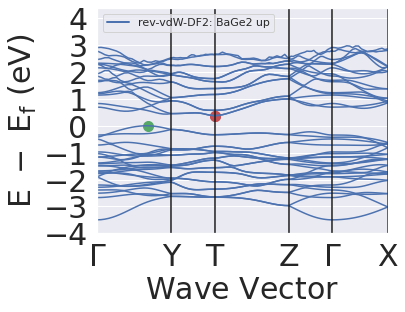

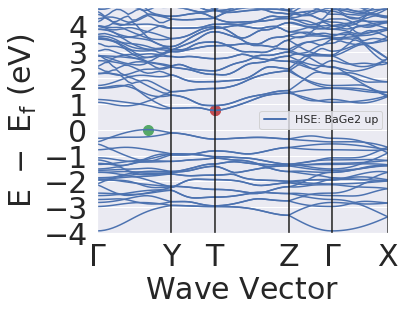

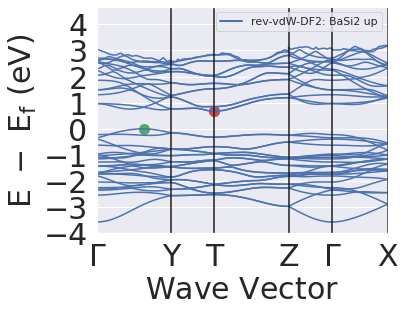

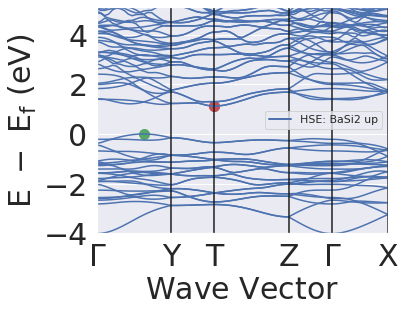

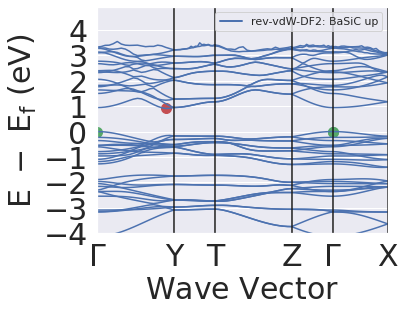

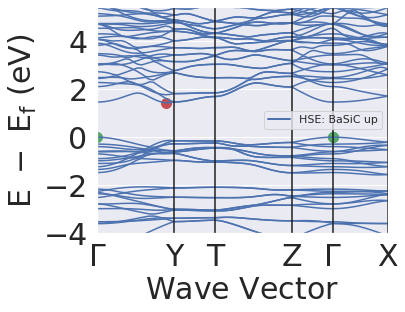

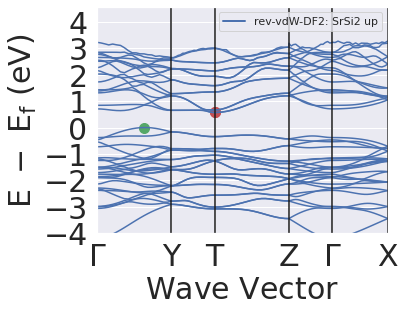

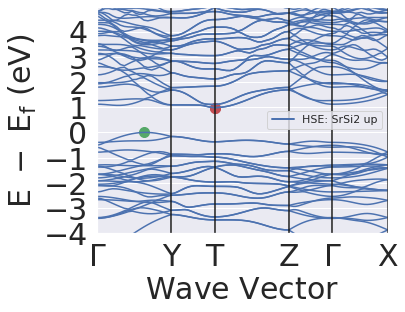

In [20]:

for folder in folders:
    thisdir = '../Bulk/' + folder + '/Band_structure/'
    thisdir2 = '../Bulk/' + folder + '/HSE/Band_structure/'

    v_rev = Vasprun(thisdir + 'vasprun.xml')
    v_hse = Vasprun(thisdir2 + 'vasprun.xml')
    gap_rev = v_rev.eigenvalue_band_properties
    gap_hse = v_hse.eigenvalue_band_properties

    #v_rev = BSVasprun(thisdir + 'vasprun.xml')
    #v_hse = BSVasprun(thisdir2 + 'vasprun.xml')
    
    bs_rev = v_rev.get_band_structure(kpoints_filename=thisdir+'KPOINTS', line_mode=True)
    bs_hse = v_hse.get_band_structure(kpoints_filename=thisdir2+'KPOINTS', line_mode=True, force_hybrid_mode=True)
    
    rev = BSPlotter(bs_rev)
    hse = BSPlotter(bs_hse)
    
    print(folder + " rev-vdW-DF2 Bandgap data: ", gap_rev)
    rev.get_plot(vbm_cbm_marker=True, bs_labels=['rev-vdW-DF2: ' + folder])
    fig = plt.gcf()
    fig.set_size_inches(w, h, forward=True)
    #rev.save_plot(filename='../Figures/Bulk/' + folder + '/' + folder + '_rev_BS.pgf', img_format='pgf')
    plt.savefig('../Figures/Bulk/' + folder + '/' + folder + '_rev_BS.pgf')
    
    
    print(folder + " HSE Bandgap data: ", gap_hse)
    hse.get_plot(vbm_cbm_marker=True, bs_labels=['HSE: ' + folder])
    fig = plt.gcf()
    fig.set_size_inches(w, h, forward=True)
    #hse.save_plot(filename='../Figures/Bulk/' + folder + '/' + folder + '_HSE_BS.pgf', img_format='pgf')
    plt.savefig('../Figures/Bulk/' + folder + '/' + folder + '_HSE_BS.pgf')
    
    #hse.plot_compare(rev)
    #rev.plot_compare(hse)
    
    #hse.plot_brillouin()
    #rev.plot_brillouin()

# Optical properties
## Dielectric constants & Absorption coefficients

/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/BaGe2/dielectric
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))


,Energy [eV],$\epsilon_1^{xx}$,$\epsilon_1^{yy}$,$\epsilon_1^{zz}$,$\epsilon_2^{xx}$,$\epsilon_2^{yy}$,$\epsilon_2^{zz}$,$\alpha$
0,0.0000,21.8358,19.6449,20.8088,0.0000,0.0000,0.0000,0.000000
1,0.0043,21.8360,19.6450,20.8090,0.0009,0.0005,0.0006,0.031882
2,0.0086,21.8366,19.6453,20.8094,0.0018,0.0010,0.0013,0.130714
3,0.0129,21.8375,19.6458,20.8101,0.0027,0.0015,0.0019,0.291710
4,0.0173,21.8389,19.6466,20.8110,0.0036,0.0020,0.0025,0.519460
...,...,...,...,...,...,...,...,...
9995,43.1082,0.8613,0.8610,0.8608,0.0001,0.0001,0.0001,235.430888
9996,43.1126,0.8613,0.8610,0.8608,0.0001,0.0001,0.0001,235.454918
9997,43.1169,0.8613,0.8610,0.8609,0.0001,0.0001,0.0001,235.473844
9998,43.1212,0.8614,0.8611,0.8609,0.0001,0.0001,0.0001,235.488211


/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/BaSi2/dielectric
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))


,Energy [eV],$\epsilon_1^{xx}$,$\epsilon_1^{yy}$,$\epsilon_1^{zz}$,$\epsilon_2^{xx}$,$\epsilon_2^{yy}$,$\epsilon_2^{zz}$,$\alpha$
0,0.0000,16.4245,15.6535,16.3607,0.0000,0.0000,0.0000,0.000000
1,0.0043,16.4246,15.6535,16.3607,0.0004,0.0002,0.0003,0.016269
2,0.0086,16.4248,15.6537,16.3609,0.0007,0.0005,0.0006,0.065077
3,0.0128,16.4252,15.6539,16.3613,0.0011,0.0007,0.0009,0.145286
4,0.0171,16.4257,15.6543,16.3617,0.0014,0.0010,0.0012,0.258787
...,...,...,...,...,...,...,...,...
9995,42.7857,0.8596,0.8596,0.8594,0.0001,0.0001,0.0001,233.873393
9996,42.7900,0.8597,0.8596,0.8595,0.0001,0.0001,0.0001,233.887826
9997,42.7943,0.8597,0.8596,0.8595,0.0001,0.0001,0.0001,233.911330
9998,42.7986,0.8597,0.8597,0.8595,0.0001,0.0001,0.0001,233.930297


/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:145: UserWarning: Float overflow (*******) encountered in vasprun
  warnings.warn("Float overflow (*******) encountered in vasprun")
/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/BaSiC/dielectric
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))


,Energy [eV],$\epsilon_1^{xx}$,$\epsilon_1^{yy}$,$\epsilon_1^{zz}$,$\epsilon_2^{xx}$,$\epsilon_2^{yy}$,$\epsilon_2^{zz}$,$\alpha$
0,0.0000,8.9000,15.9787,11.2829,0.0000,0.0000,0.0000,0.000000
1,0.0044,8.9000,15.9788,11.2829,0.0001,0.0004,0.0002,0.014986
2,0.0088,8.9001,15.9790,11.2830,0.0001,0.0007,0.0003,0.047098
3,0.0132,8.9002,15.9794,11.2832,0.0002,0.0011,0.0005,0.115603
4,0.0176,8.9003,15.9800,11.2834,0.0003,0.0014,0.0006,0.196950
...,...,...,...,...,...,...,...,...
9995,43.9848,0.8602,0.8581,0.8603,0.0001,0.0001,0.0001,240.427863
9996,43.9892,0.8603,0.8582,0.8603,0.0001,0.0001,0.0001,240.442588
9997,43.9936,0.8603,0.8582,0.8603,0.0001,0.0001,0.0001,240.466639
9998,43.9980,0.8603,0.8582,0.8604,0.0001,0.0001,0.0001,240.486025


/home/msismail/.local/share/virtualenvs/DFT-Git-T2v16yvm/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1016: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Bulk/SrSi2/dielectric
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))


,Energy [eV],$\epsilon_1^{xx}$,$\epsilon_1^{yy}$,$\epsilon_1^{zz}$,$\epsilon_2^{xx}$,$\epsilon_2^{yy}$,$\epsilon_2^{zz}$,$\alpha$
0,0.0000,18.6116,17.5829,18.7487,0.0000,0.0000,0.0000,0.000000
1,0.0052,18.6118,17.5830,18.7488,0.0005,0.0004,0.0005,0.028736
2,0.0104,18.6122,17.5833,18.7492,0.0011,0.0007,0.0009,0.110838
3,0.0156,18.6129,17.5837,18.7498,0.0016,0.0011,0.0014,0.252460
4,0.0208,18.6139,17.5844,18.7507,0.0022,0.0015,0.0019,0.459753
...,...,...,...,...,...,...,...,...
9995,52.0448,0.8995,0.8996,0.8993,0.0000,0.0000,0.0000,0.000000
9996,52.0500,0.8995,0.8997,0.8993,0.0000,0.0000,0.0000,0.000000
9997,52.0552,0.8995,0.8997,0.8994,0.0000,0.0000,0.0000,0.000000
9998,52.0604,0.8995,0.8997,0.8994,0.0000,0.0000,0.0000,0.000000


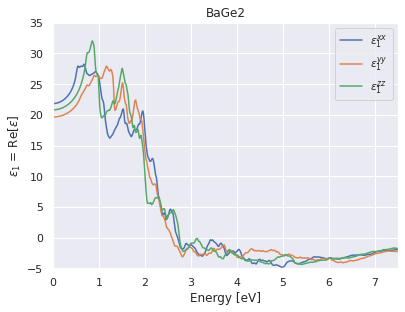

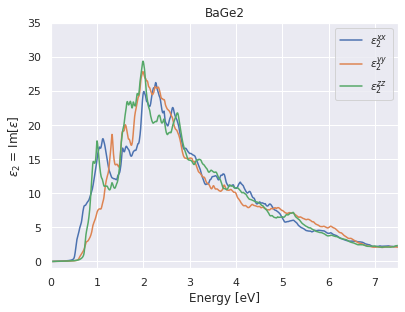

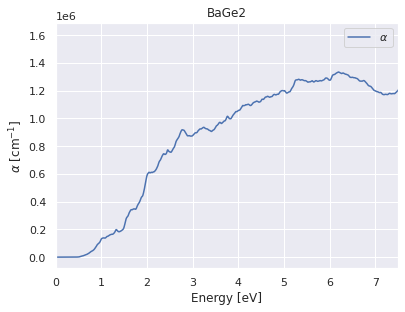

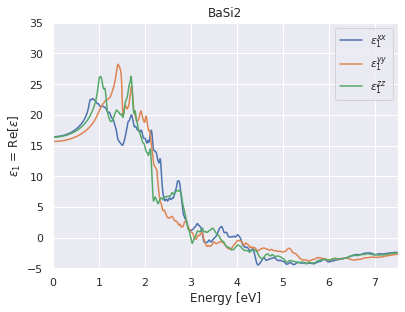

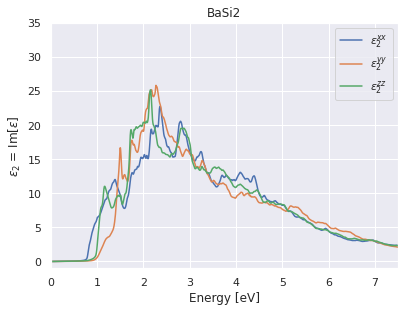

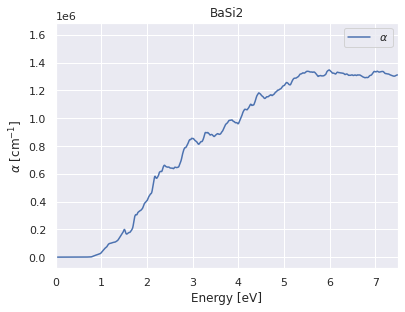

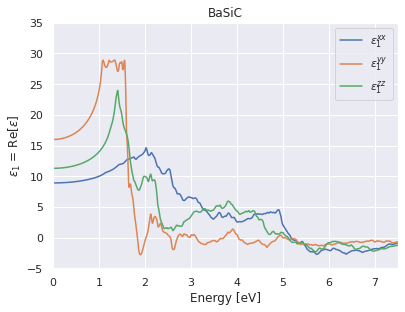

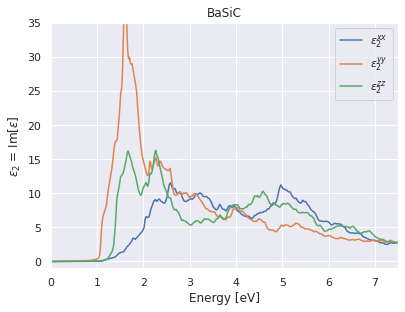

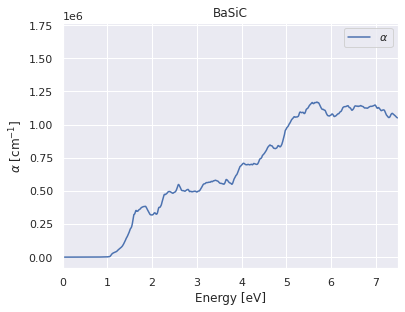

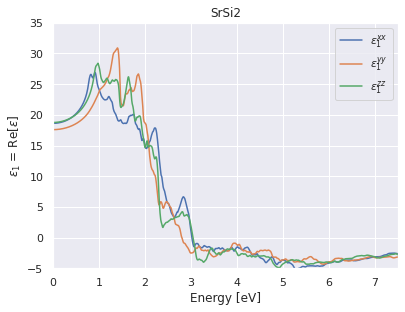

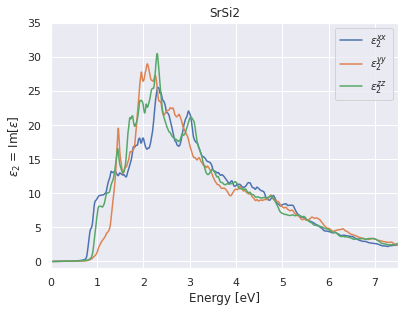

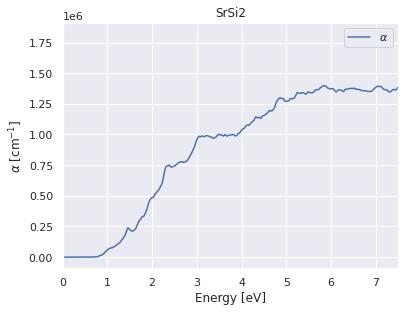

In [21]:
dielectric = {}
hbar = 6.582119514e-16 # eV/s
for folder in folders:
    thisdir = '../Bulk/' + folder + '/dielectric/'

    v_rev = Vasprun(thisdir+'vasprun.xml')
    
    """
    The data is given as a tuple of 3 values 
    containing each of them the energy, 
    the real part tensor, and the 
    imaginary part tensor 
    ([energies], 
    [[real_partxx,real_partyy,
    real_partzz,real_partxy, 
    real_partyz,real_partxz]],
    [[imag_partxx,imag_partyy,imag_partzz, 
    imag_partxy, 
    imag_partyz, 
    imag_partxz]])
    """
    
    de = v_rev.dielectric
    
    ab = np.array(v_rev.optical_absorption_coeff)
    
    real_xx, real_yy, real_zz, real_xy, real_xz, real_yz = zip(*de[1])
    im_xx, im_yy, im_zz, im_xy, im_xz, im_yz = zip(*de[2])
    
    dielectric[folder] = pd.DataFrame({'Energy [eV]': de[0], 
                                      '$\epsilon_1^{xx}$': list(real_xx),
                                       '$\epsilon_1^{yy}$': list(real_yy),
                                       '$\epsilon_1^{zz}$': list(real_zz),
                                       '$\epsilon_2^{xx}$': list(im_xx),
                                       '$\epsilon_2^{yy}$': list(im_yy),
                                       '$\epsilon_2^{zz}$': list(im_zz),
                                       '$\\alpha$': ab,
                                      })
    
    display(dielectric[folder])
    
    real_labels = [
        '$\epsilon_1^{xx}$',
        '$\epsilon_1^{yy}$',
        '$\epsilon_1^{zz}$',
    ]
    
    im_labels = [
        '$\epsilon_2^{xx}$',
        '$\epsilon_2^{yy}$',
        '$\epsilon_2^{zz}$',
    ]
    
    dielectric[folder].plot(x='Energy [eV]', y=real_labels, 
                            xlim=[0,7.5], ylim=[-5,35], title=folder, 
                            ylabel="$\epsilon_1$ = Re[$\epsilon$]", 
                            legend=True)
    
    
    plt.savefig('../Figures/Bulk/' + folder + '/' + folder + '_epsilon1.pgf')
        
    dielectric[folder].plot(x='Energy [eV]', y=im_labels, 
                            xlim=[0,7.5], ylim=[-1,35], title=folder, 
                            ylabel="$\epsilon_2$ = Im[$\epsilon$]", 
                            legend=True)
    
    plt.savefig('../Figures/Bulk/' + folder + '/' + folder + '_epsilon2.pgf')
    
    dielectric[folder].plot(x='Energy [eV]', y='$\\alpha$', 
                            xlim=[0,7.5], title=folder,
                            ylabel='$\\alpha$ [cm$^{-1}$]',
                            legend=True)
    
    plt.savefig('../Figures/Bulk/' + folder + '/' + folder + '_abs.pgf')
    